In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [6]:
# Load metadata
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'  # Update this to your actual metadata path
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'  # Update this to your actual zip file path
metadata = pd.read_csv(metadata_path)
metadata.head()

id       genus   species subspecies           name  \
0  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
1  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
2  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
3  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
4  557838  Thryomanes  bewickii        NaN  Bewick's Wren   

                recordist        country  \
0  Whitney Neufeld-Kaiser  United States   
1  Whitney Neufeld-Kaiser  United States   
2  Whitney Neufeld-Kaiser  United States   
3  Whitney Neufeld-Kaiser  United States   
4  Whitney Neufeld-Kaiser  United States   

                                  location  latitude  longitude altitude  \
0  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
1  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
2  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
3  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
4  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   

                   sound_type                   source_url  \
0  adult, sex uncertain, song  //www.xeno-canto.org/557838   
1  adult, sex uncertain, song  //www.xeno-canto.org/557838   
2  adult, sex uncertain, song  //www.xeno-canto.org/557838   
3  adult, sex uncertain, song  //www.xeno-canto.org/557838   
4  adult, sex uncertain, song  //www.xeno-canto.org/557838   

                                        license   time        date  \
0  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
1  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
2  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
3  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   
4  //creativecommons.org/licenses/by-nc-sa/4.0/  11:51  2020-03-14   

                                             remarks      filename  
0  Recorded with Voice Record Pro on iPhone7, nor...  557838-0.wav  
1  Recorded with Voice Record Pro on iPhone7, nor...  557838-1.wav  
2  Recorded with Voice Record Pro on iPhone7, nor...  557838-4.wav  
3  Recorded with Voice Record Pro on iPhone7, nor...  557838-5.wav  
4  Recorded with Voice Record Pro on iPhone7, nor...  557838-6.wav

In [7]:
metadata.describe()

id     latitude    longitude
count    5422.000000  5332.000000  5332.000000
mean   292957.202139    36.938532  -101.548349
std    158950.516002     5.999919    18.099531
min     11713.000000    21.299500  -165.405300
25%    165291.000000    32.545800  -116.461000
50%    321905.000000    35.987000  -106.245900
75%    412669.000000    40.570000   -84.505200
max    565242.000000    64.503500   -68.375000

In [8]:
# Print basic metadata info
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5422 non-null   int64  
 1   genus       5422 non-null   object 
 2   species     5422 non-null   object 
 3   subspecies  1546 non-null   object 
 4   name        5422 non-null   object 
 5   recordist   5422 non-null   object 
 6   country     5422 non-null   object 
 7   location    5422 non-null   object 
 8   latitude    5332 non-null   float64
 9   longitude   5332 non-null   float64
 10  altitude    5380 non-null   object 
 11  sound_type  5422 non-null   object 
 12  source_url  5422 non-null   object 
 13  license     5422 non-null   object 
 14  time        5422 non-null   object 
 15  date        5422 non-null   object 
 16  remarks     3563 non-null   object 
 17  filename    5422 non-null   object 
dtypes: float64(2), int64(1), object(15)
memory usage: 762.6+ KB


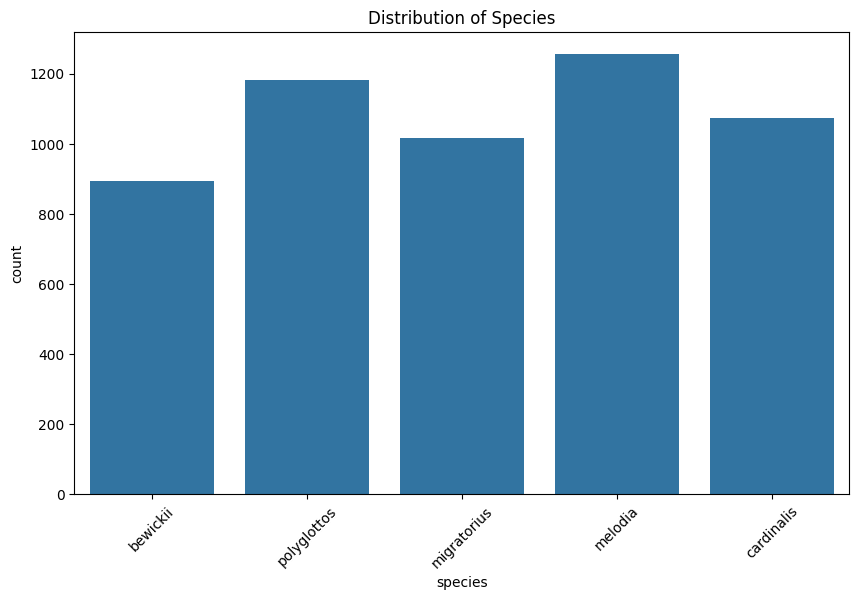

In [9]:
# Plot distributions of a categorical metadata field, e.g., species
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata, x='species')
plt.title('Distribution of Species')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Function to extract features from audio files
def extract_features(zip_path, metadata):
    features = []
    with zipfile.ZipFile(zip_path, 'r') as z:
        for _, row in metadata.iterrows():
            file_path = os.path.join('wavfiles', row['filename'])  # Adjust according to how your filenames are stored in metadata
            if file_path in z.namelist():
                with z.open(file_path) as file:
                    y, sr = librosa.load(file, sr=None)
                    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
                    features.append([np.mean(spectral_centroid), np.std(spectral_centroid)])  # Example features
    return features

In [11]:
features = extract_features(zip_path, metadata)
if not features:
    print("No features were extracted. Check the file paths and contents of the zip file.")
else:
    features_df = pd.DataFrame(features, columns=['spectral_centroid_mean', 'spectral_centroid_std'])
    features_df.head()  # Check the first few rows of the DataFrame

   spectral_centroid_mean  spectral_centroid_std
0             2441.044286            1054.623428
1             1868.449537             943.484766
2             2489.234171            1027.473604
3             2602.992298             936.994743
4             2273.063968             839.023554


In [12]:
# Assuming features is not empty and features_df has been created successfully
metadata = pd.concat([metadata.reset_index(drop=True), features_df.reset_index(drop=True)], axis=1)

In [13]:
from tqdm import tqdm  # Optional for progress display

def extract_features(zip_path, metadata):
    features = []
    error_files = []  # To keep track of files that cause errors

    with zipfile.ZipFile(zip_path, 'r') as z:
        for _, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
            file_path = os.path.join('wavfiles', row['filename'])
            if file_path in z.namelist():
                try:
                    with z.open(file_path) as file:
                        y, sr = librosa.load(file, sr=None)
                        # Ensure there's enough audio to process
                        if len(y) > 0:
                            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
                            if spectral_centroid.size > 0:
                                features.append([np.mean(spectral_centroid), np.std(spectral_centroid)])
                            else:
                                error_files.append(file_path)
                        else:
                            error_files.append(file_path)
                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")
                    error_files.append(file_path)
    return features, error_files

# Extract features and get the list of error files
features, error_files = extract_features(zip_path, metadata)

if features:
    features_df = pd.DataFrame(features, columns=['spectral_centroid_mean', 'spectral_centroid_std'])
    # Append features to the metadata DataFrame
    metadata = pd.concat([metadata.loc[metadata['filename'].apply(lambda x: x not in error_files)].reset_index(drop=True),
                          features_df.reset_index(drop=True)], axis=1)
    print(f"Processed {len(features)} files successfully.")
    print(f"Skipped {len(error_files)} files due to errors.")
else:
    print("No features were extracted. Check the file paths and contents of the zip file.")

100%|██████████| 5422/5422 [01:27<00:00, 62.11it/s]

Processed 5422 files successfully.
Skipped 0 files due to errors.


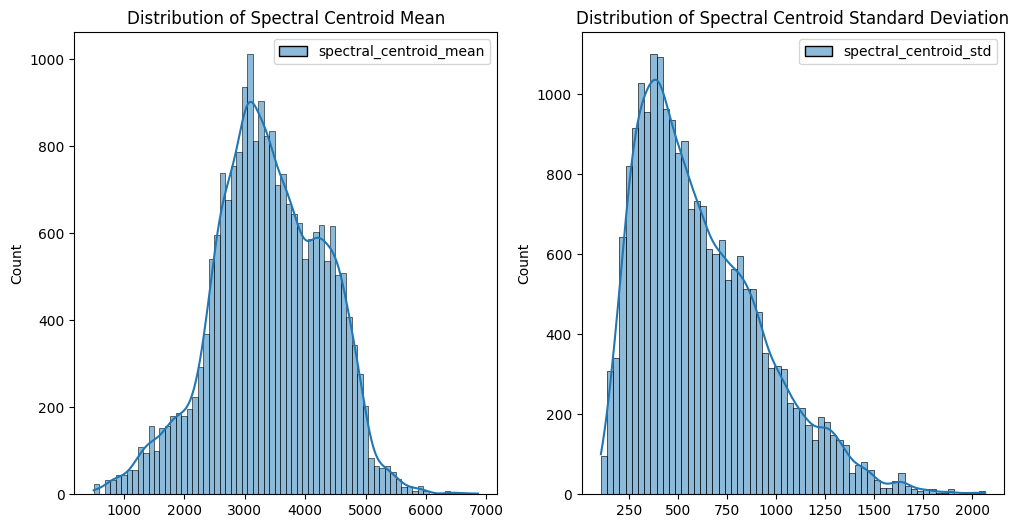

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `metadata` is your DataFrame that includes the extracted features

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(metadata['spectral_centroid_mean'], kde=True)
plt.title('Distribution of Spectral Centroid Mean')

plt.subplot(1, 2, 2)
sns.histplot(metadata['spectral_centroid_std'], kde=True)
plt.title('Distribution of Spectral Centroid Standard Deviation')
plt.show()

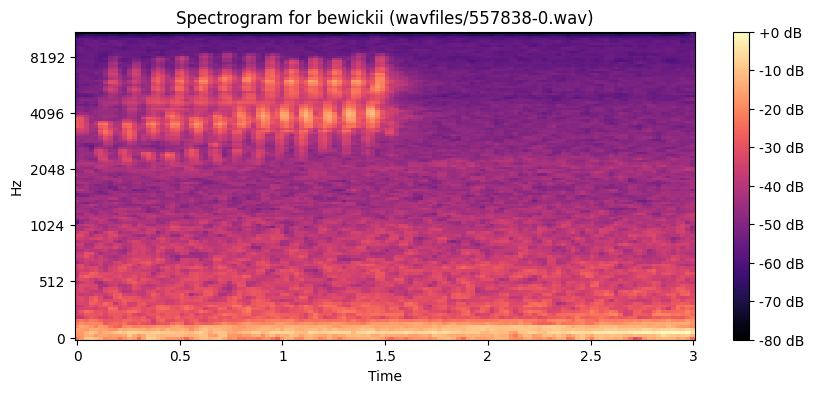

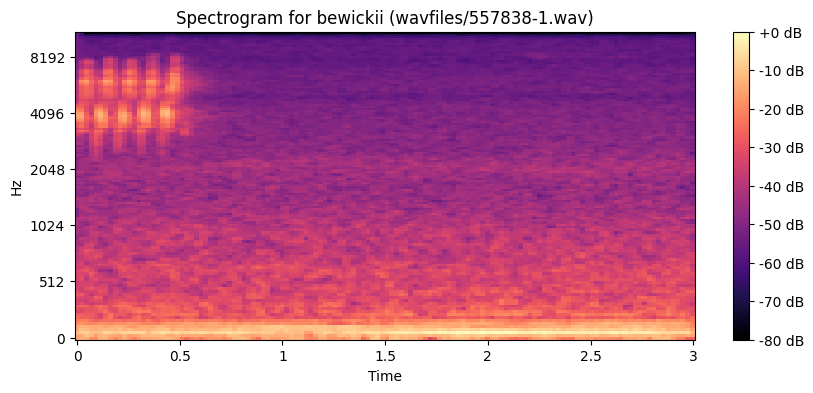

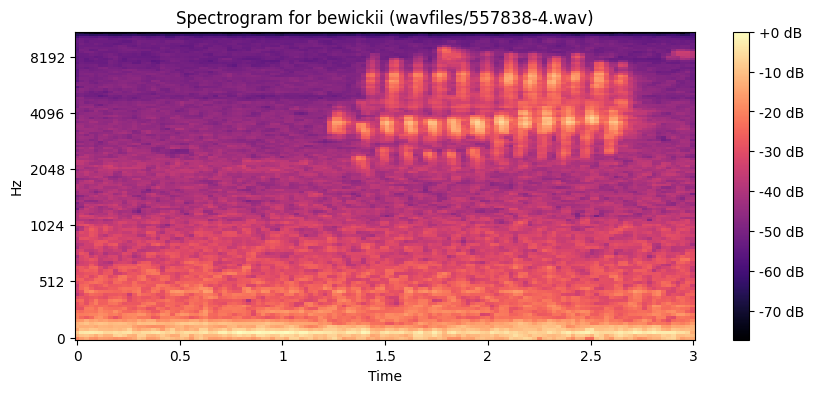

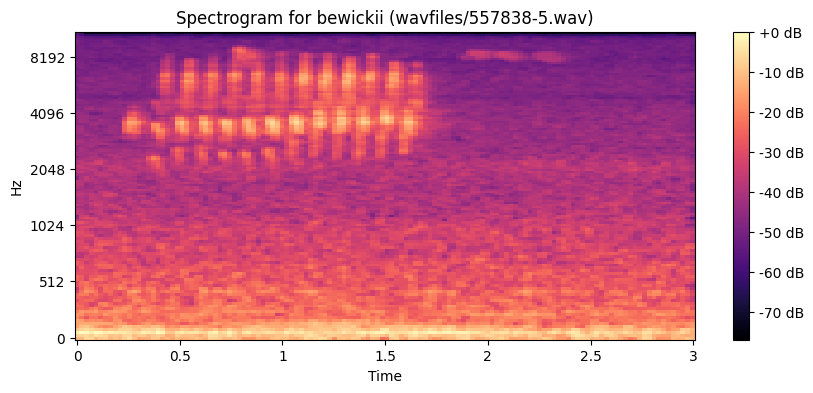

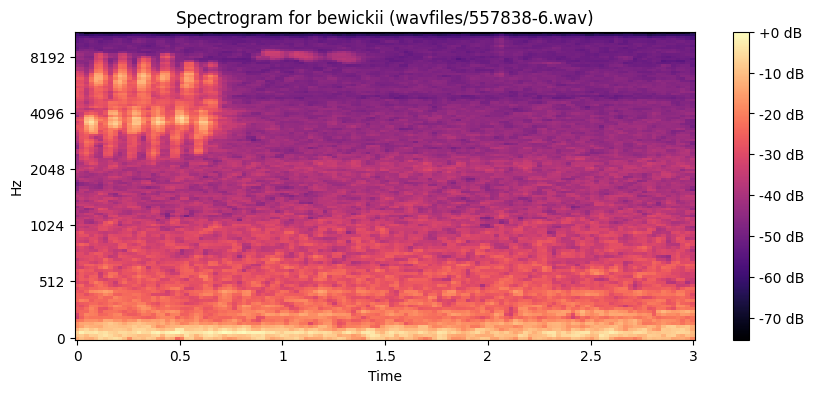

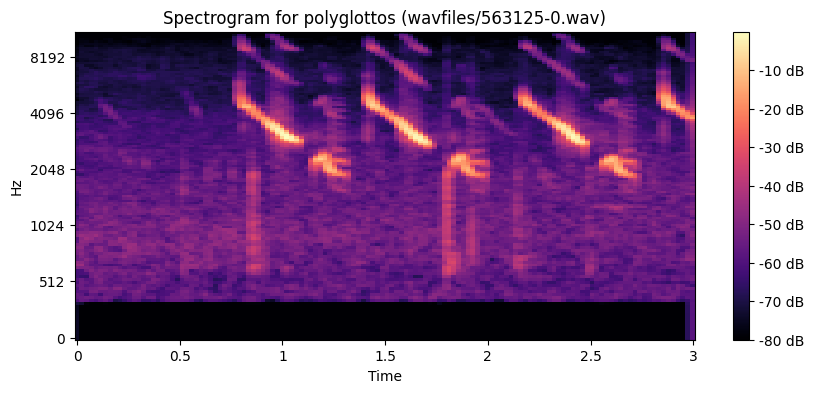

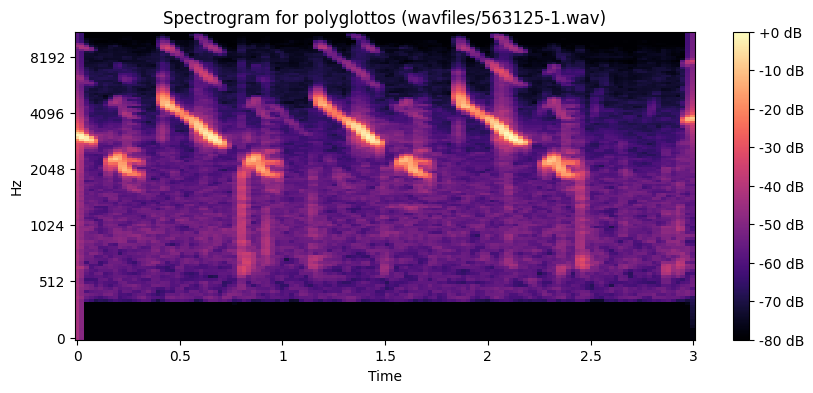

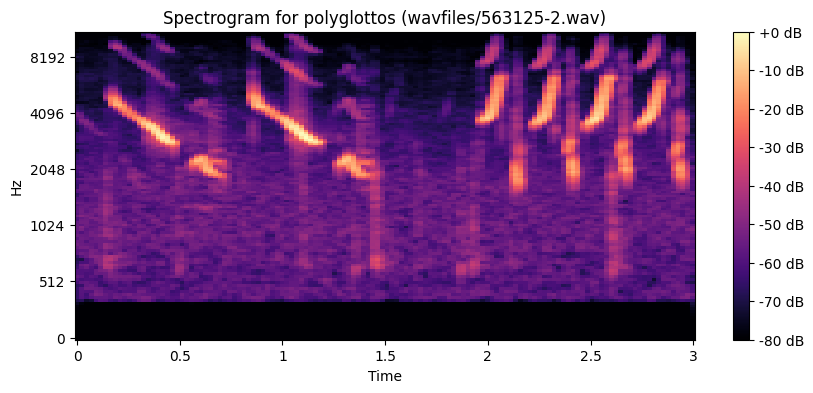

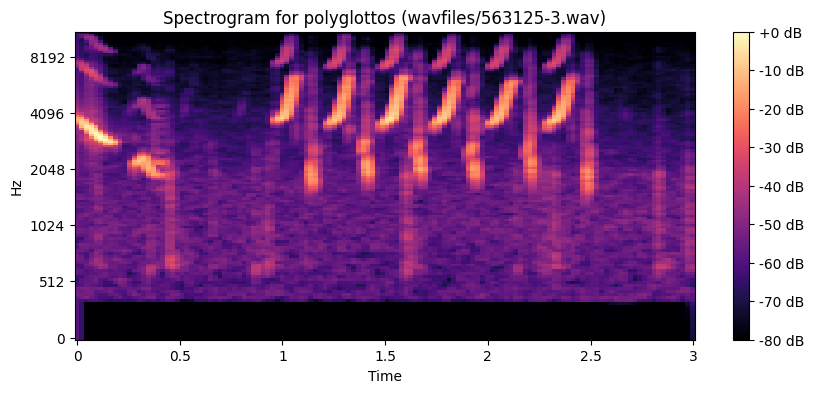

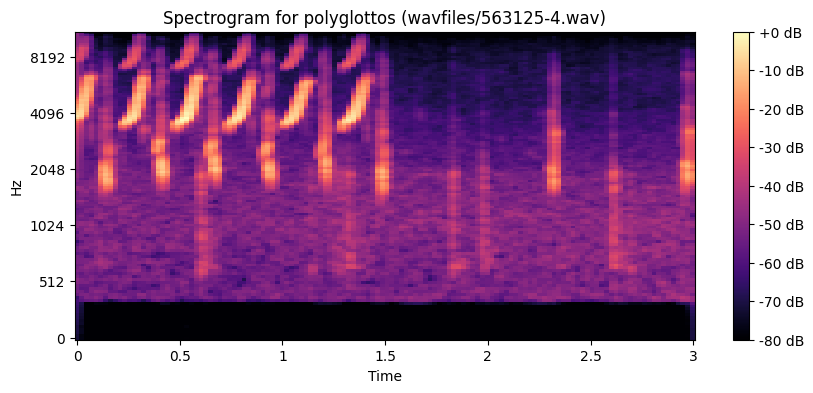

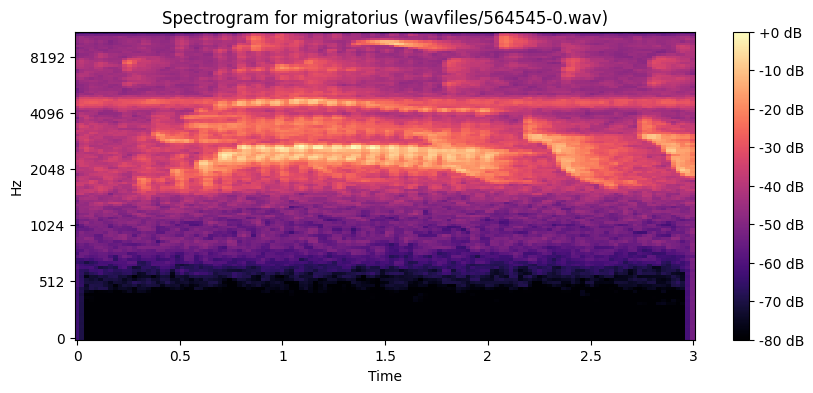

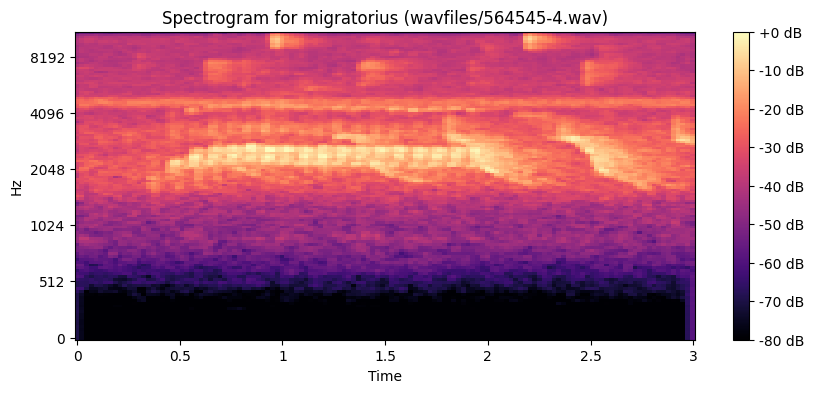

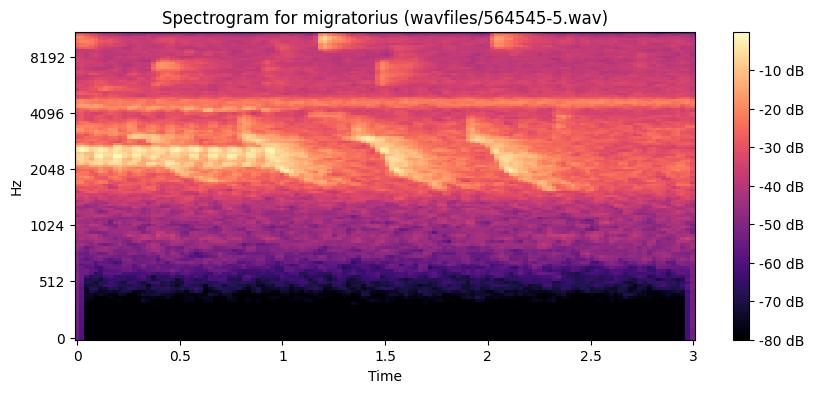

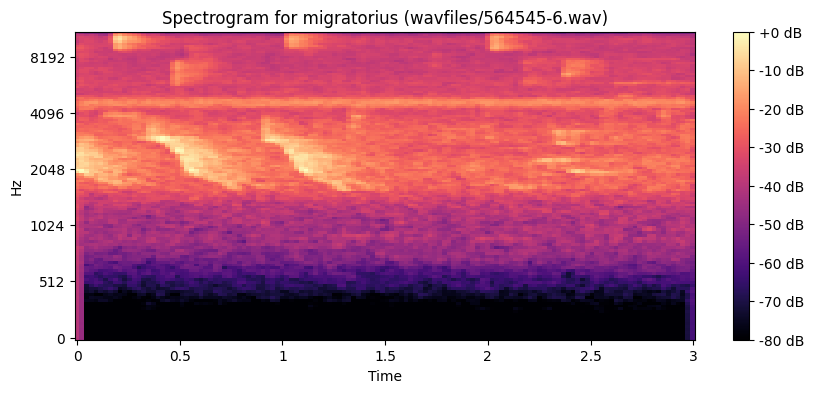

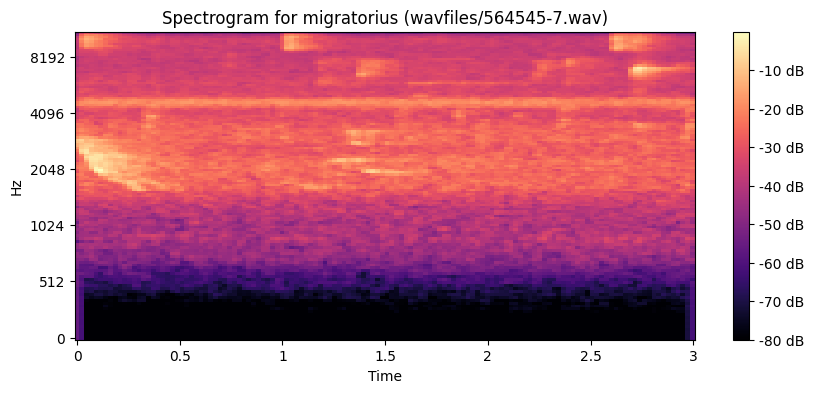

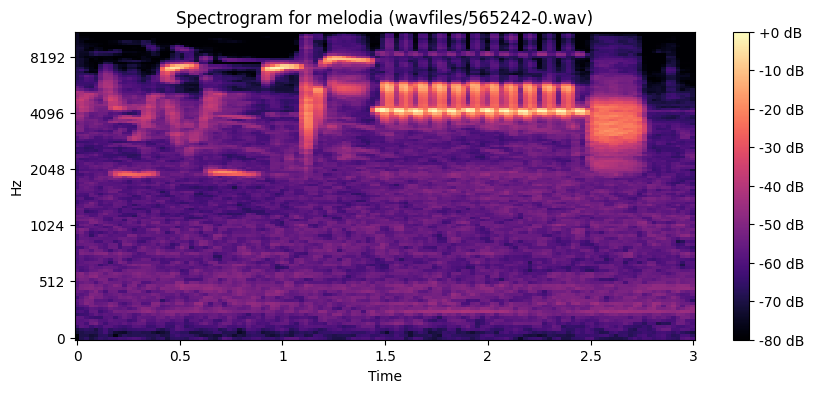

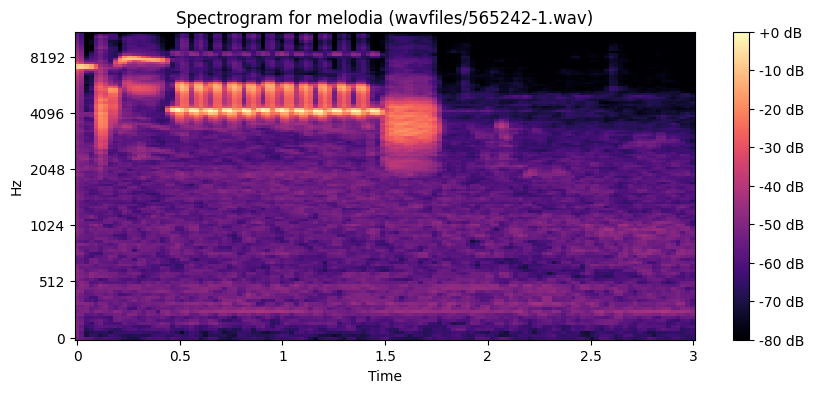

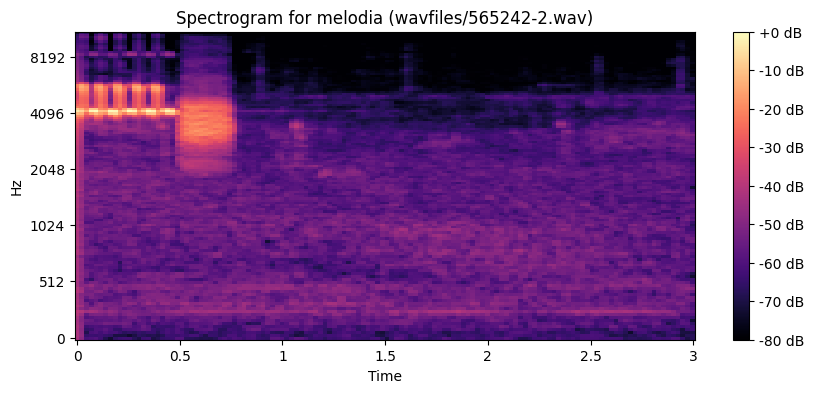

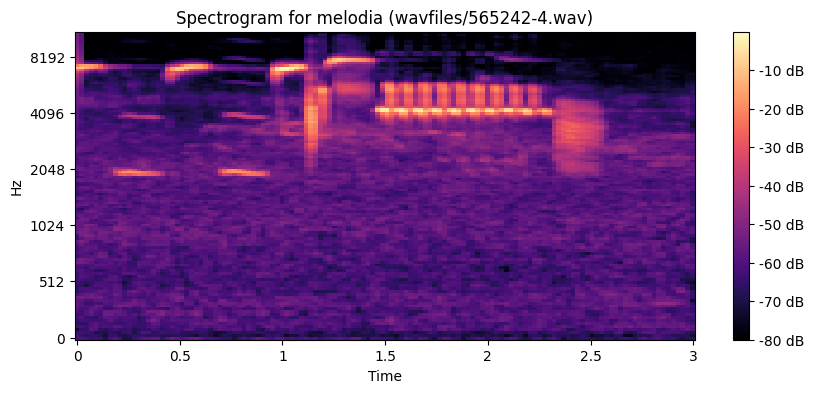

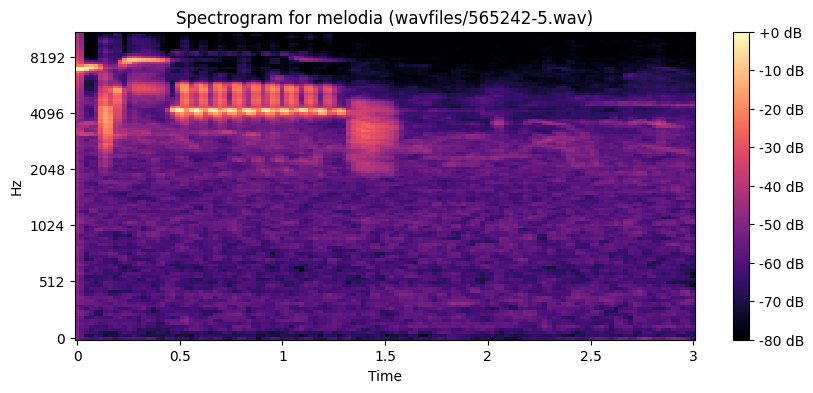

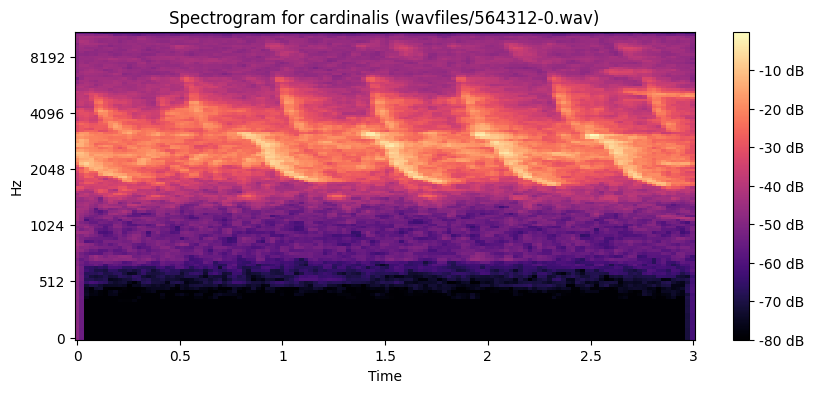

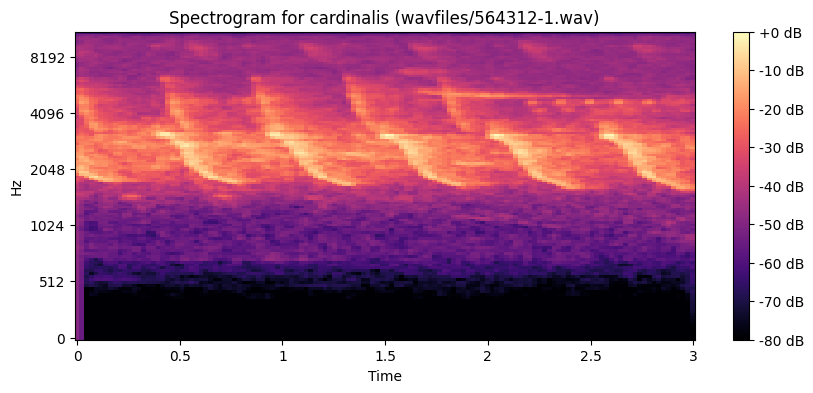

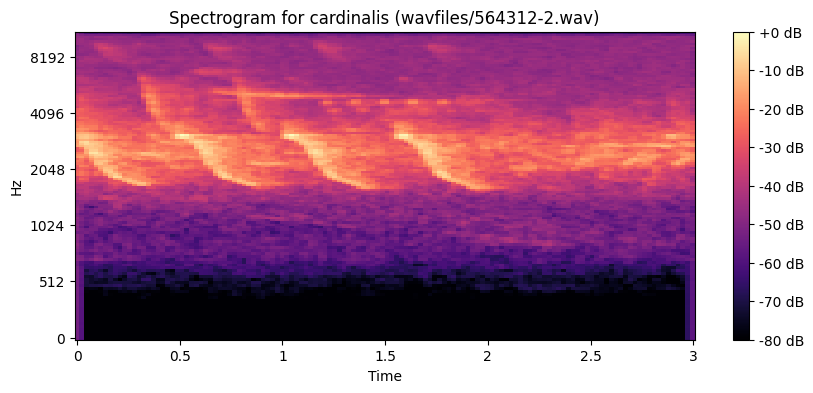

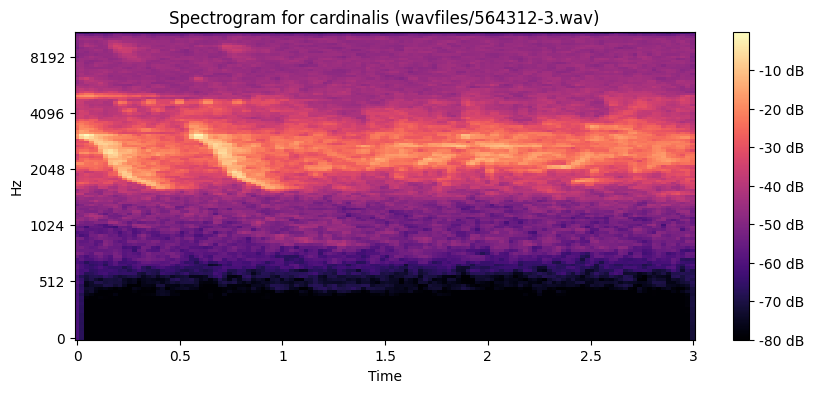

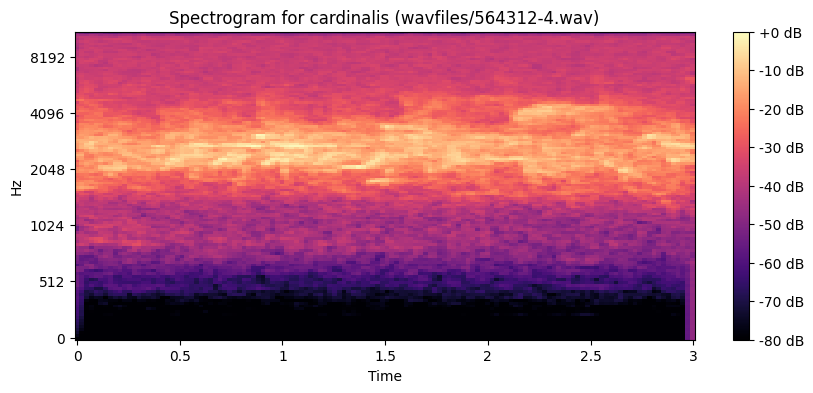

In [4]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import zipfile
from collections import defaultdict
import os

# Load metadata
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'  # Update this to your actual metadata path
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'  # Update this to your actual zip file path

metadata = pd.read_csv(metadata_path)

# Function to extract and plot Mel spectrograms
def extract_and_plot_spectrograms(metadata, zip_path):
    species_count = defaultdict(int)
    max_plots_per_species = 5

    with zipfile.ZipFile(zip_path, 'r') as z:
        for index, row in metadata.iterrows():
            species = row['species']
            if species_count[species] < max_plots_per_species:
                file_path = os.path.join('wavfiles', row['filename'])  # Adjust according to how your filenames are stored in metadata
                if file_path in z.namelist():
                    with z.open(file_path) as file:
                        y, sr = librosa.load(file, sr=None)
                        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
                        S_DB = librosa.power_to_db(S, ref=np.max)

                        plt.figure(figsize=(10, 4))
                        librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
                        plt.colorbar(format='%+2.0f dB')
                        plt.title(f'Spectrogram for {species} ({file_path})')
                        plt.show()

                        species_count[species] += 1

# Call the function
extract_and_plot_spectrograms(metadata, zip_path)


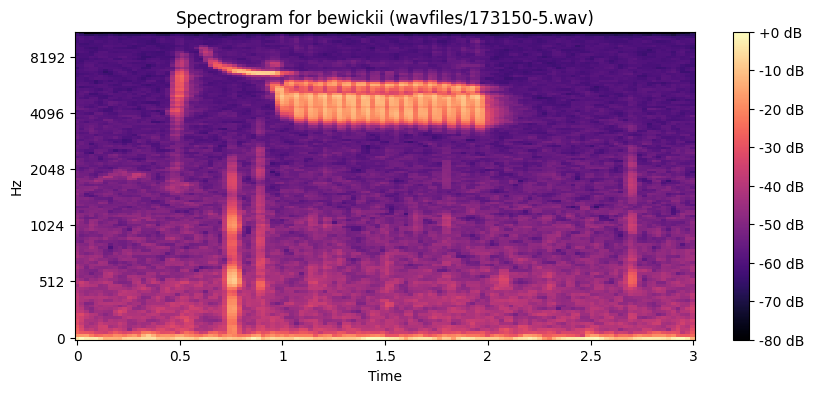

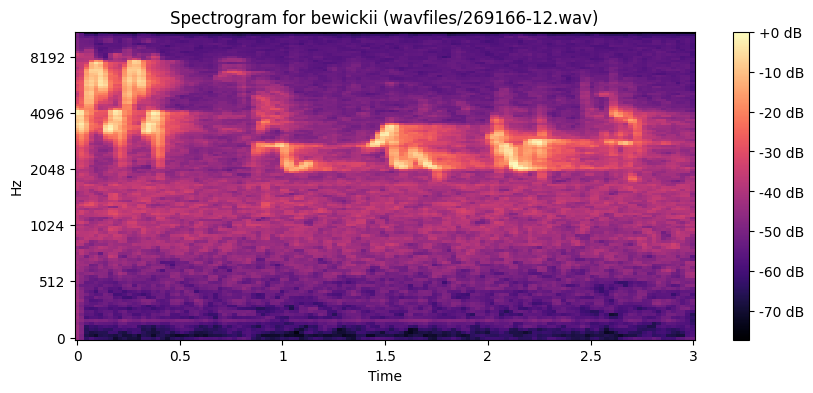

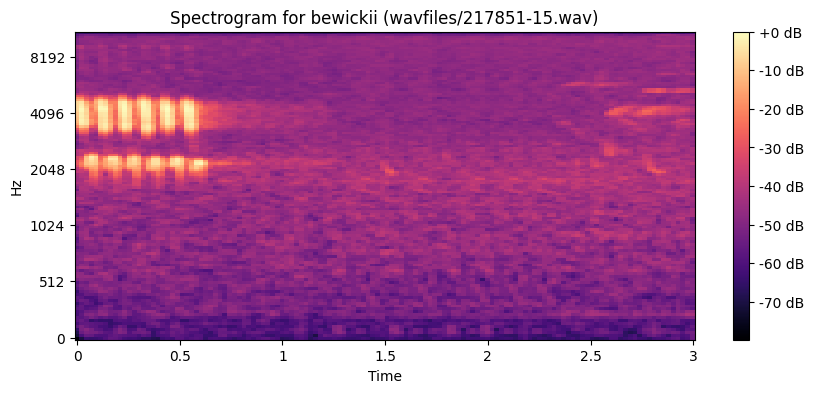

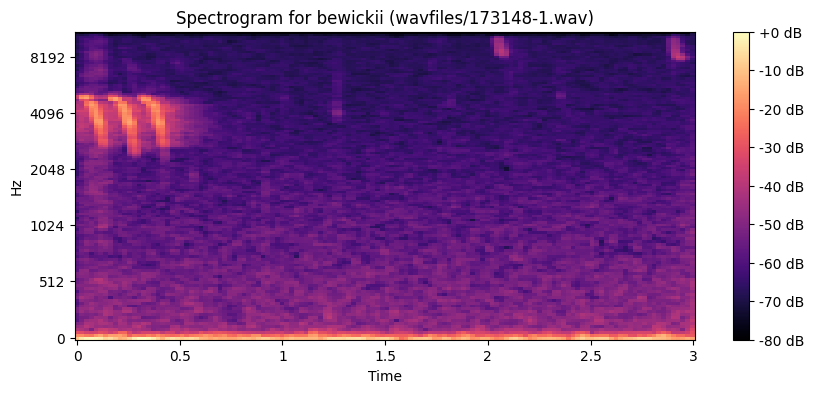

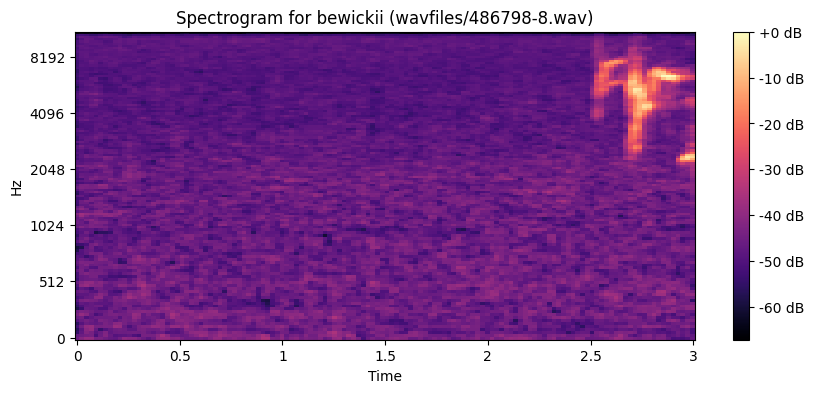

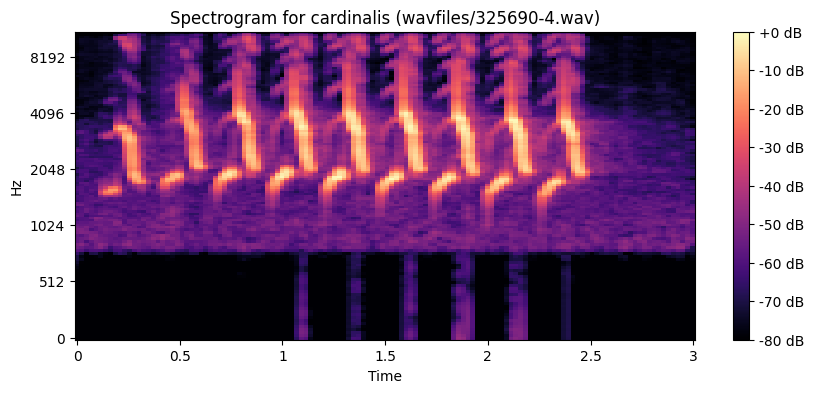

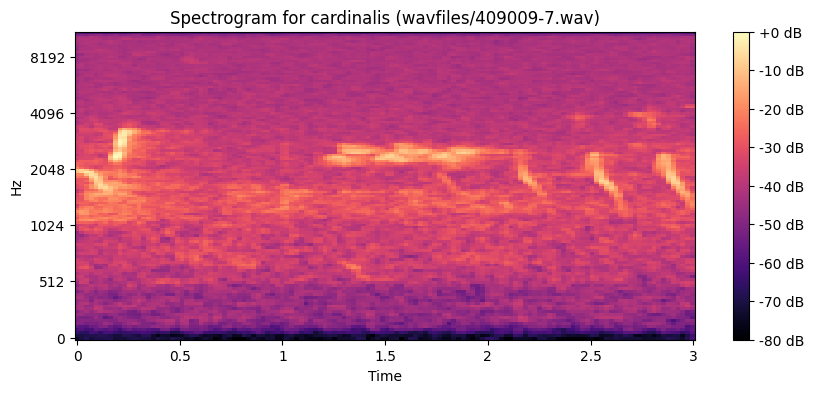

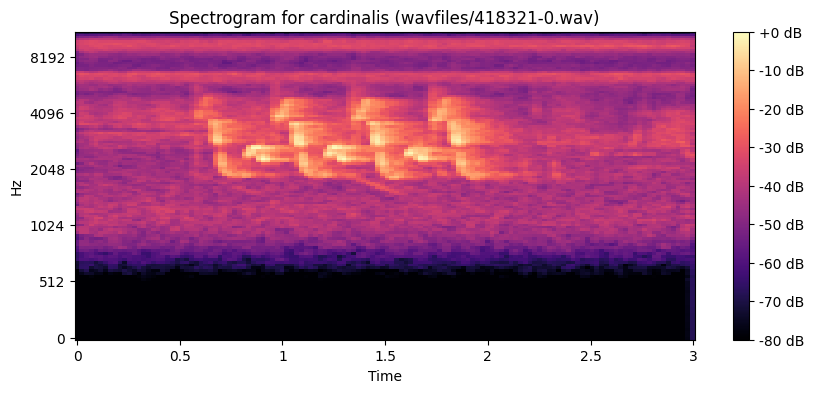

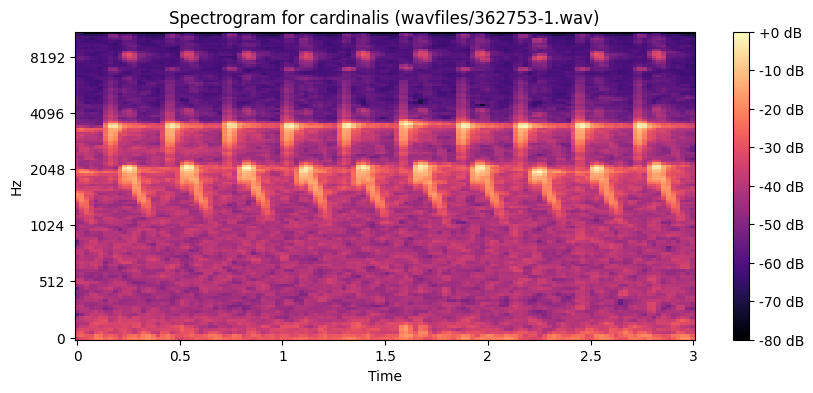

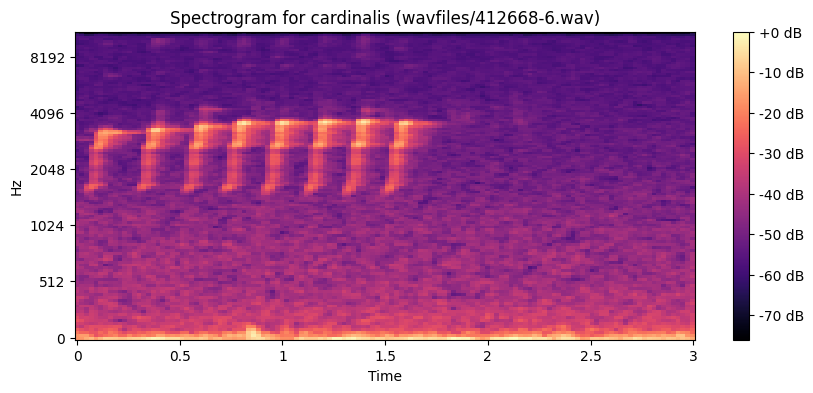

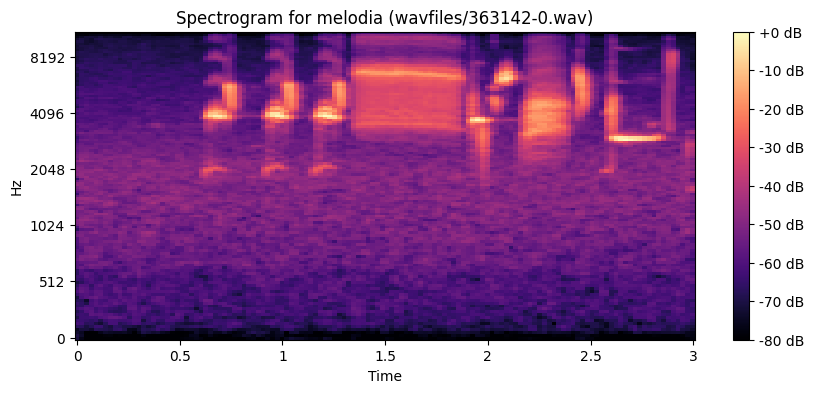

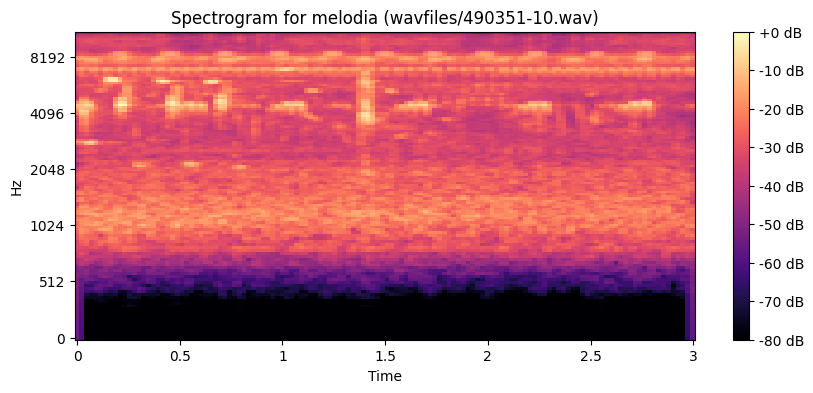

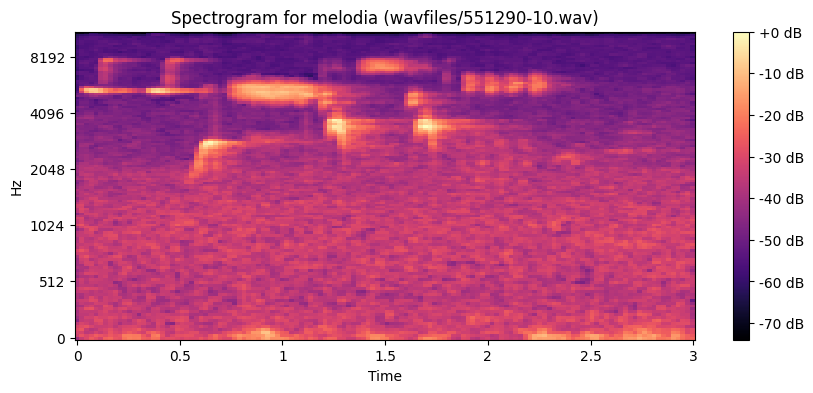

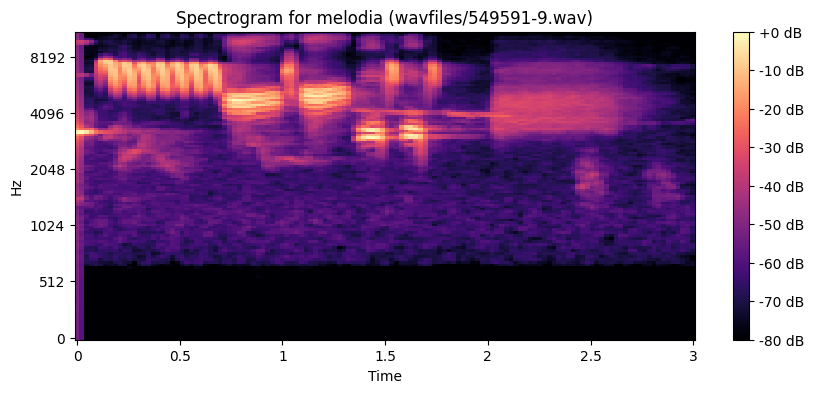

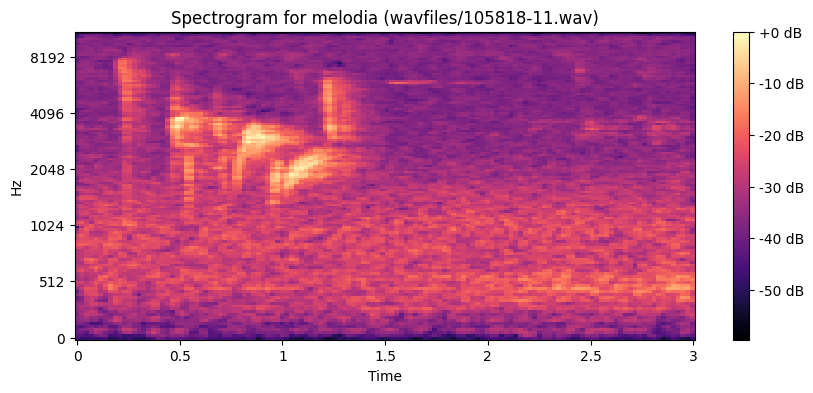

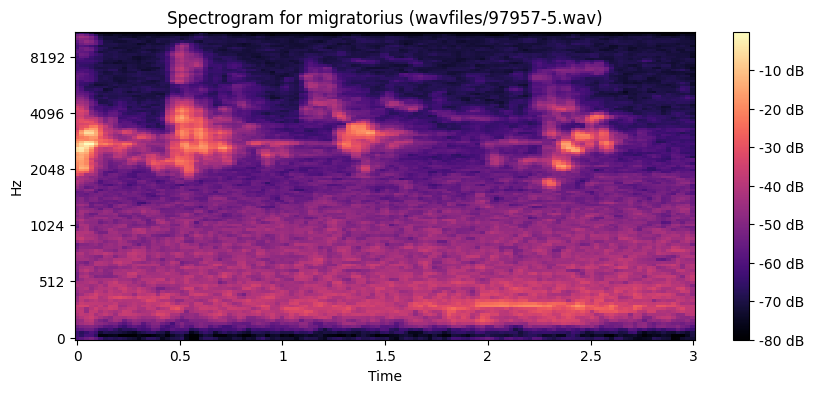

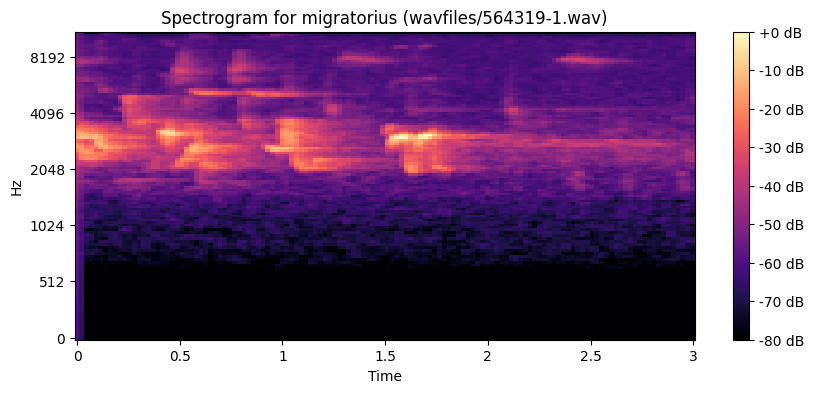

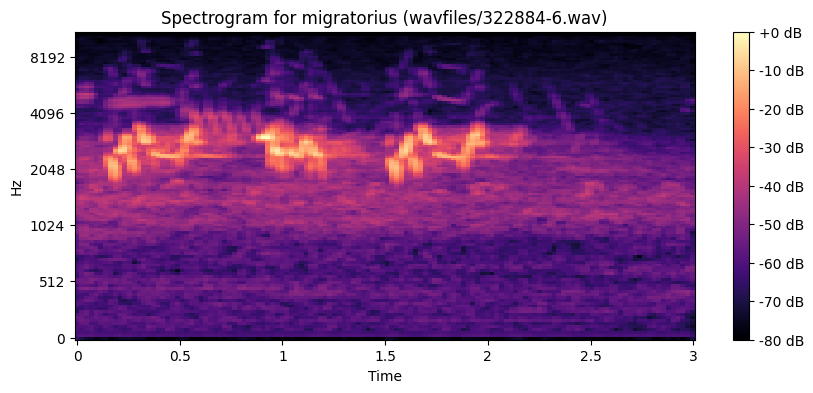

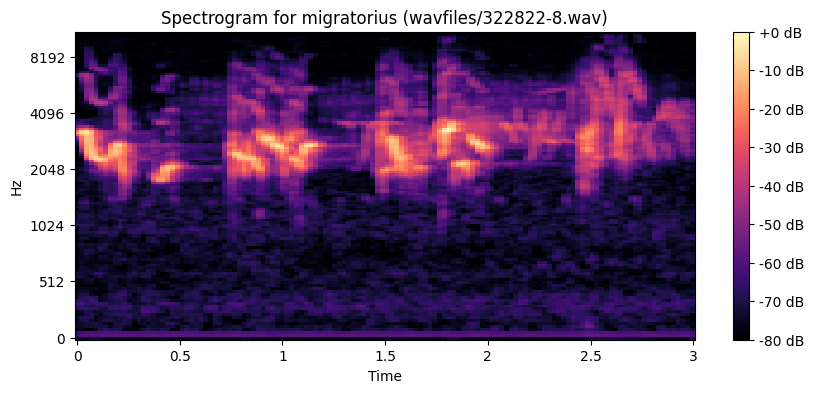

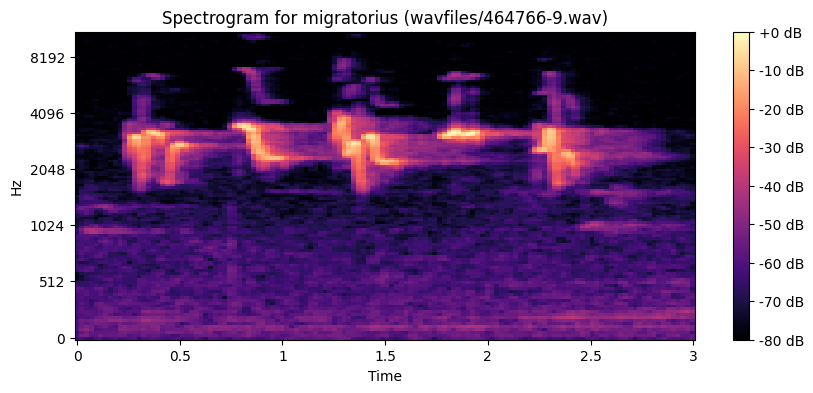

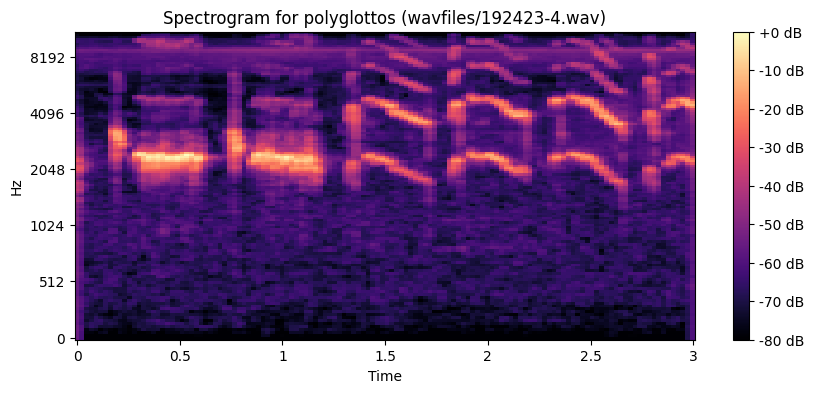

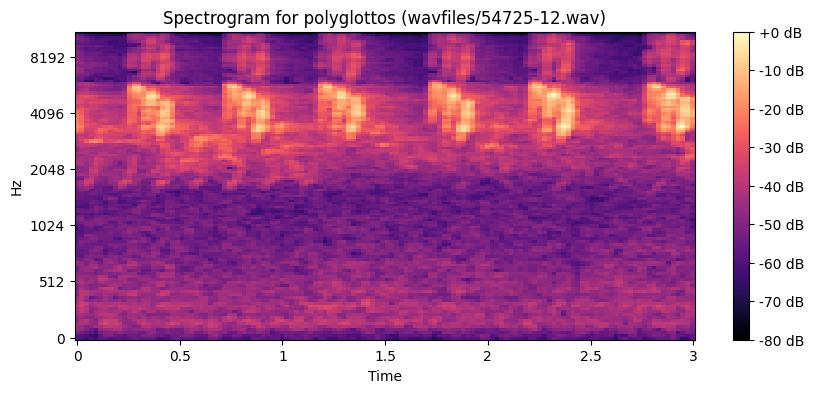

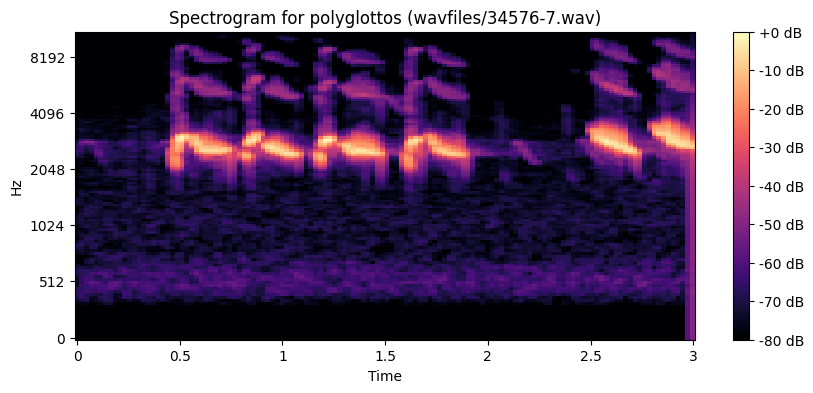

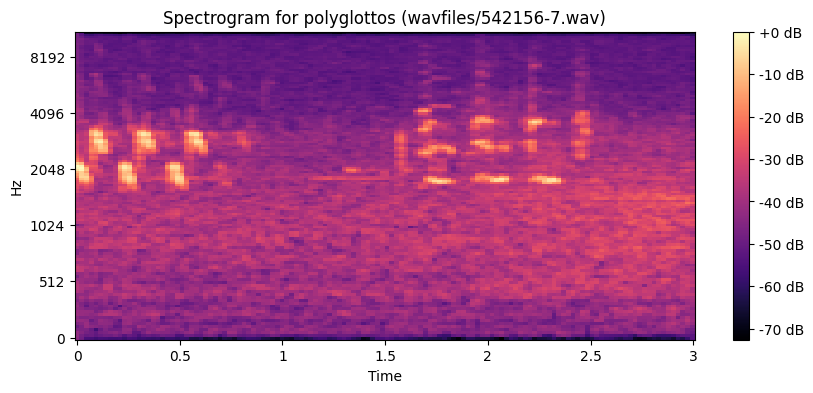

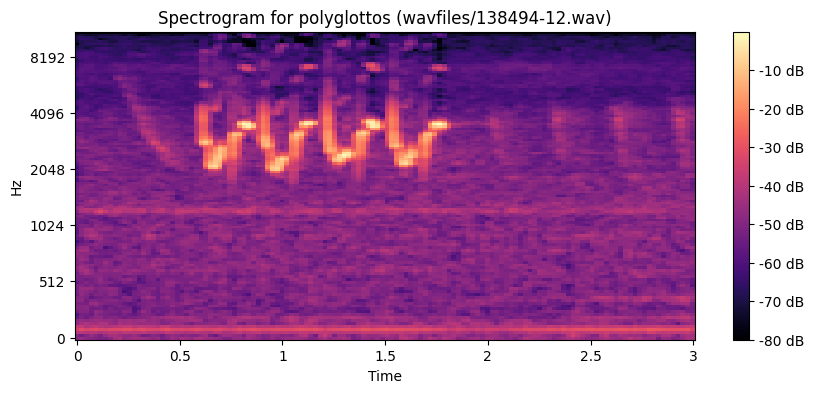

In [6]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import zipfile
from collections import defaultdict

# Load metadata
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'  # Update this to your actual metadata path
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'  # Update this to your actual zip file path

metadata = pd.read_csv(metadata_path)

# Randomly sample 5 entries per species
sampled_metadata = metadata.groupby('species').apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True)

# Function to extract and plot Mel spectrograms
def extract_and_plot_spectrograms(metadata, zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        for index, row in metadata.iterrows():
            species = row['species']
            file_path = os.path.join('wavfiles', row['filename'])  # Adjust according to how your filenames are stored in metadata
            if file_path in z.namelist():
                with z.open(file_path) as file:
                    y, sr = librosa.load(file, sr=None)
                    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
                    S_DB = librosa.power_to_db(S, ref=np.max)

                    plt.figure(figsize=(10, 4))
                    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
                    plt.colorbar(format='%+2.0f dB')
                    plt.title(f'Spectrogram for {species} ({file_path})')  # Include file name in the title
                    plt.show()

# Call the function
extract_and_plot_spectrograms(sampled_metadata, zip_path)


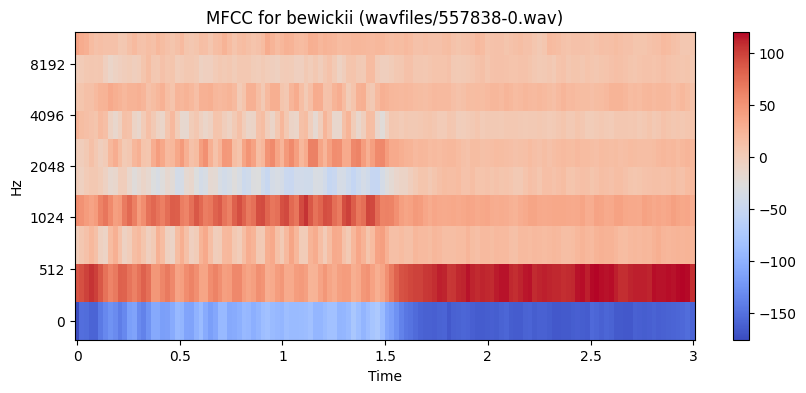

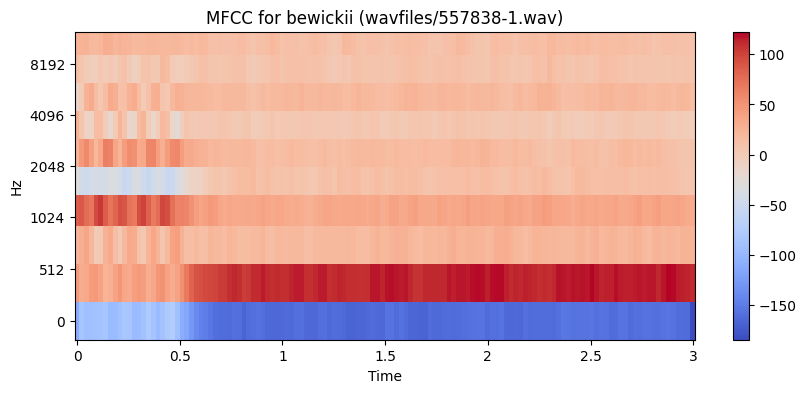

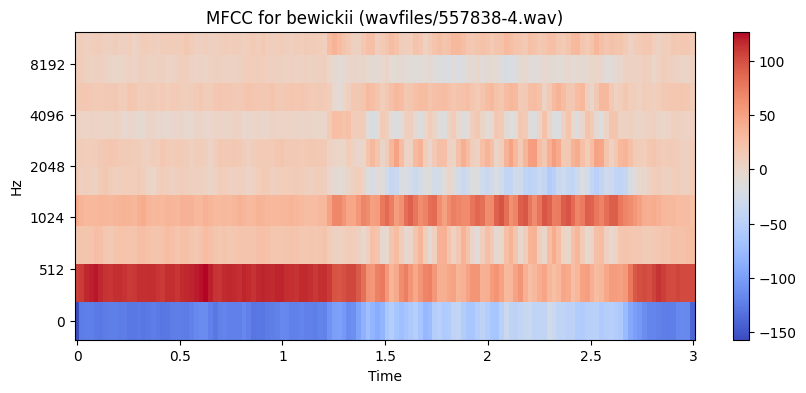

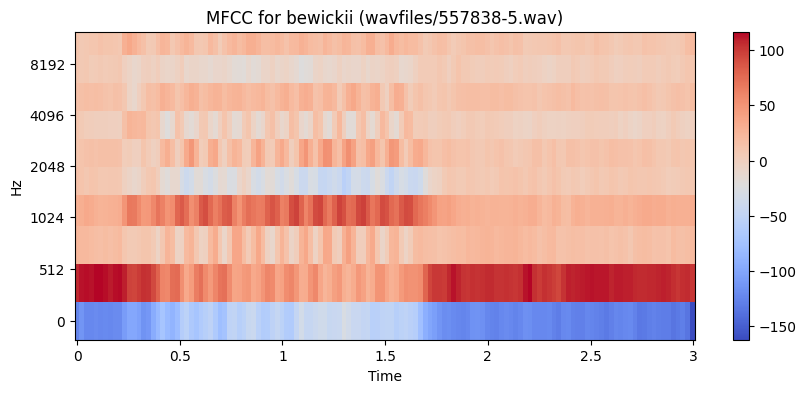

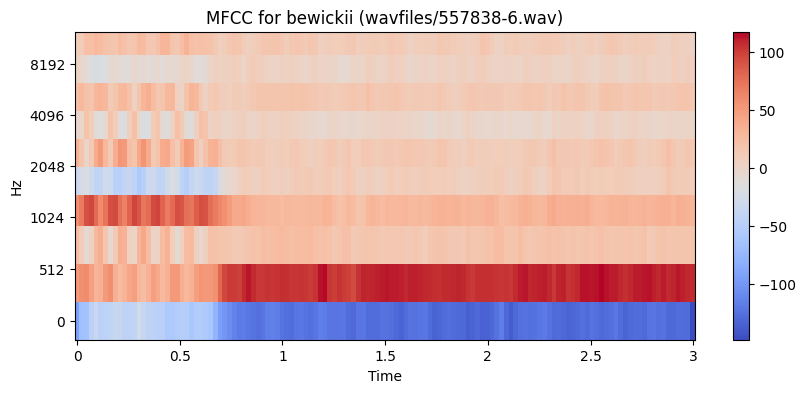

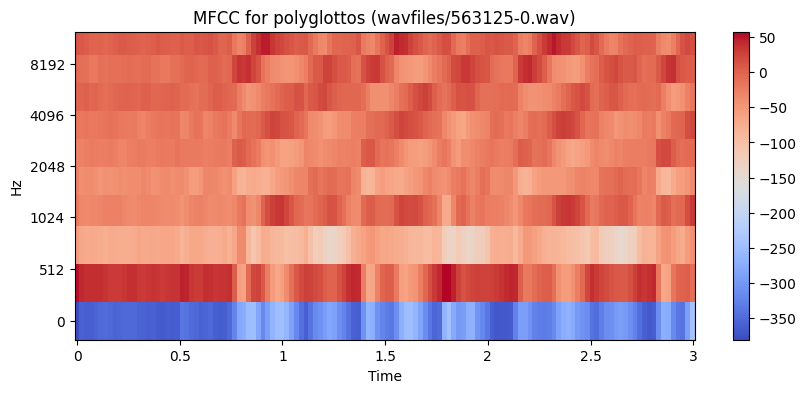

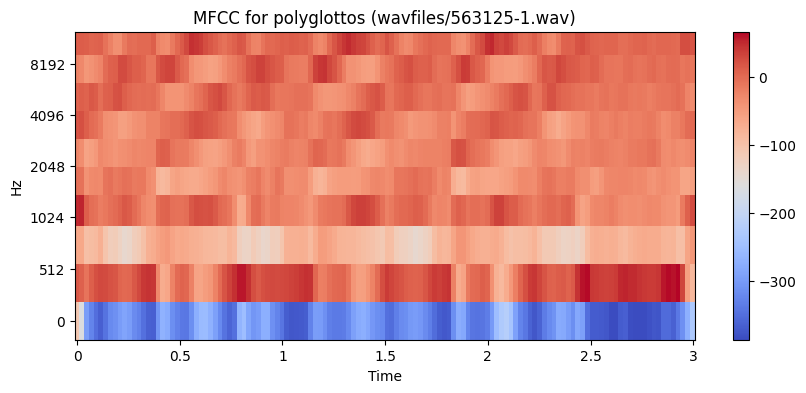

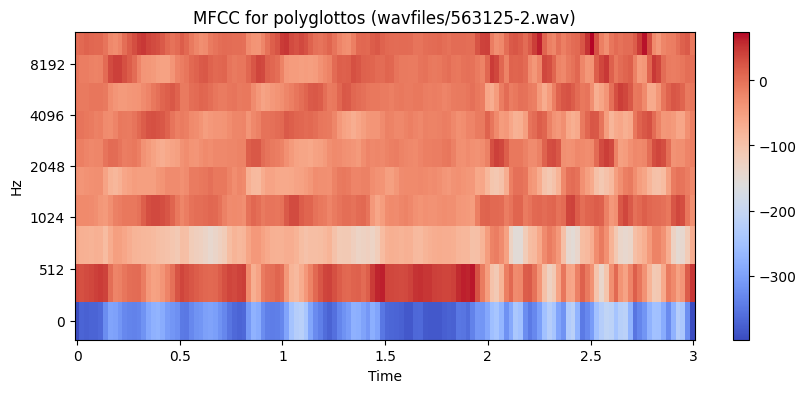

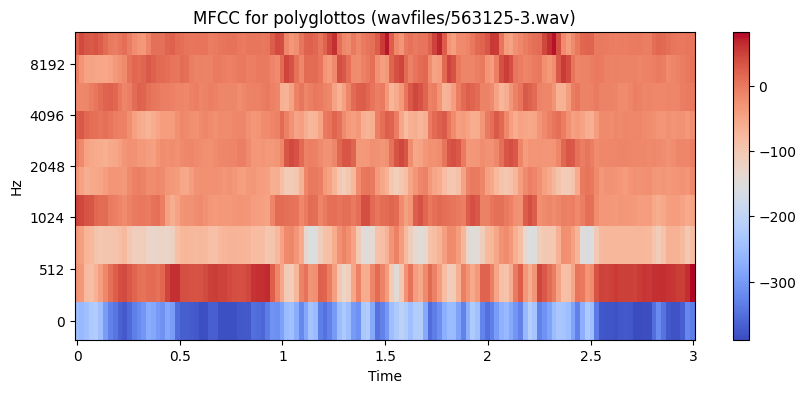

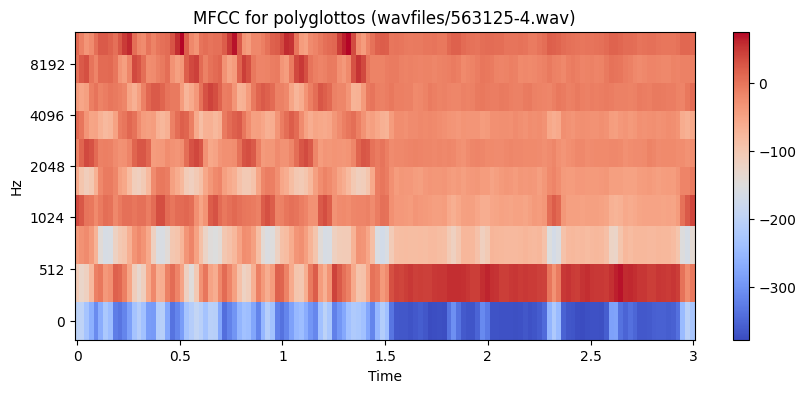

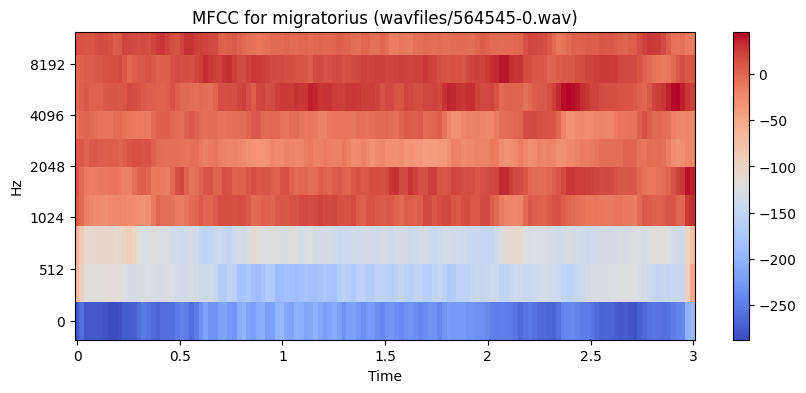

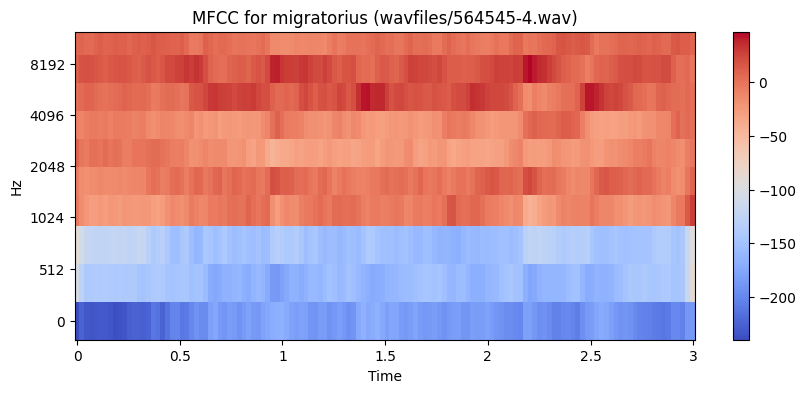

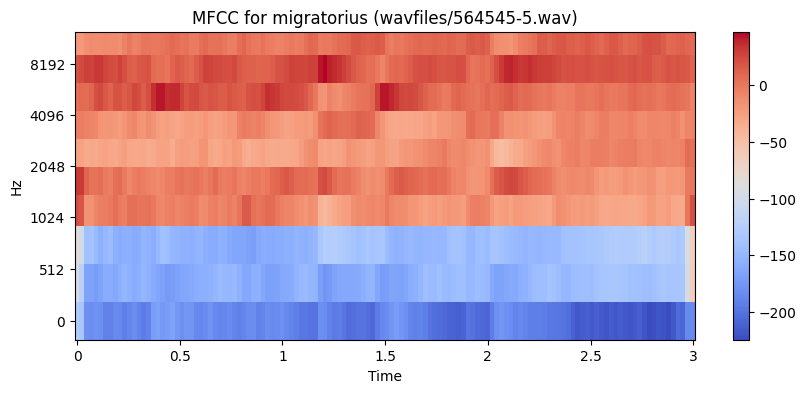

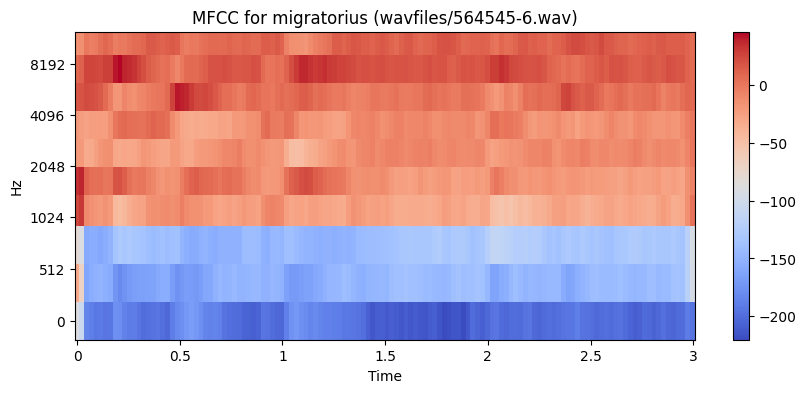

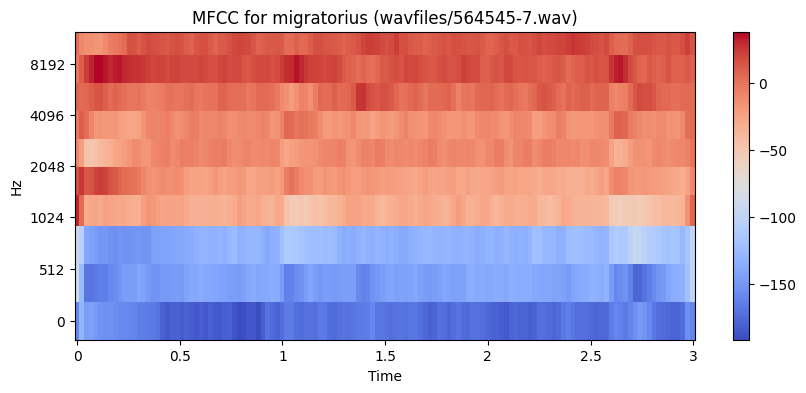

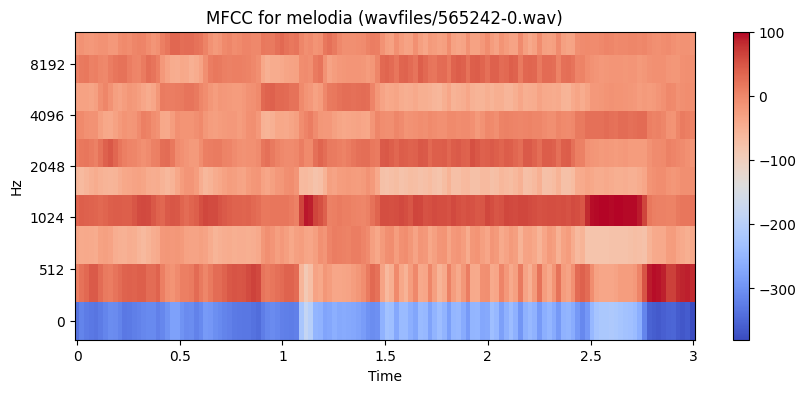

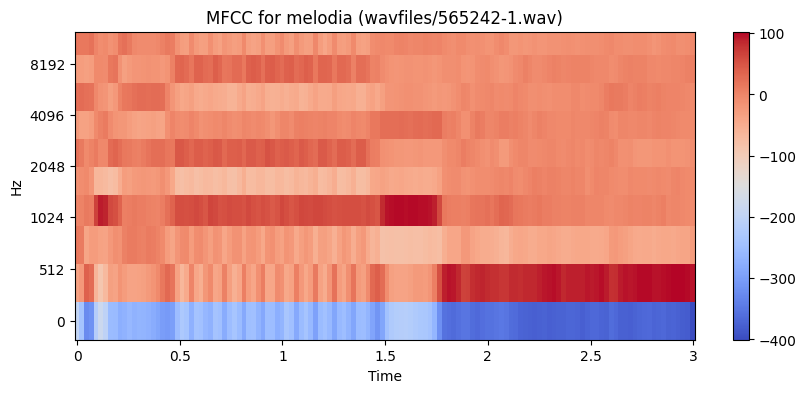

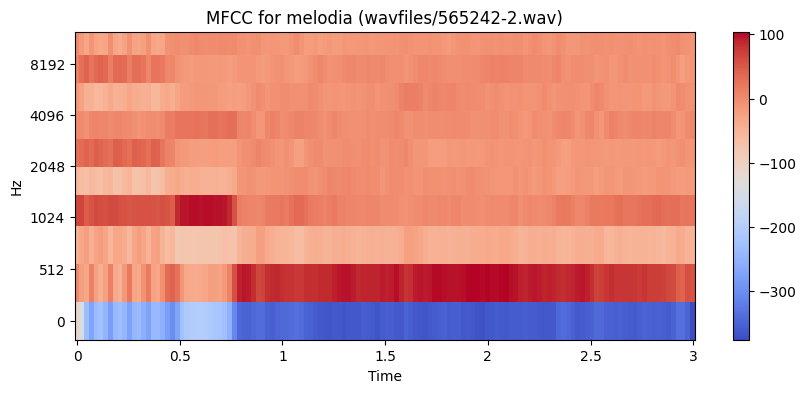

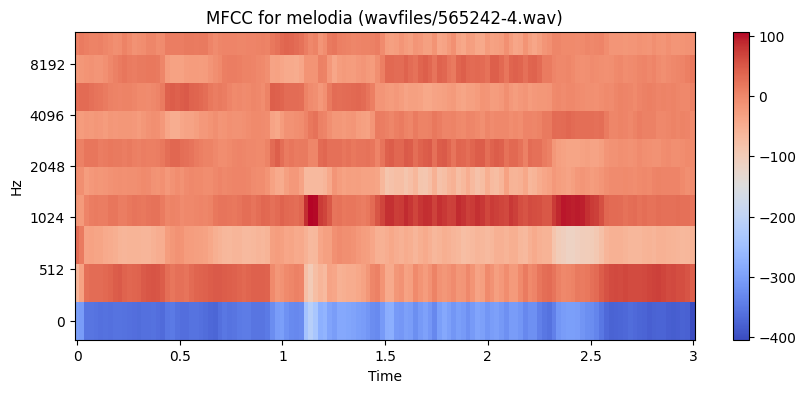

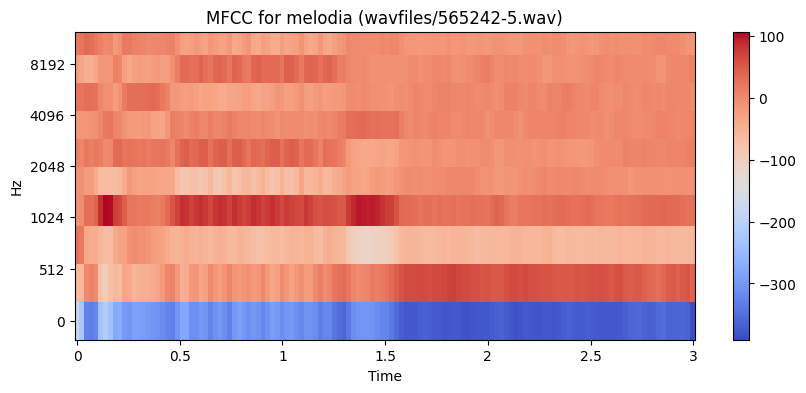

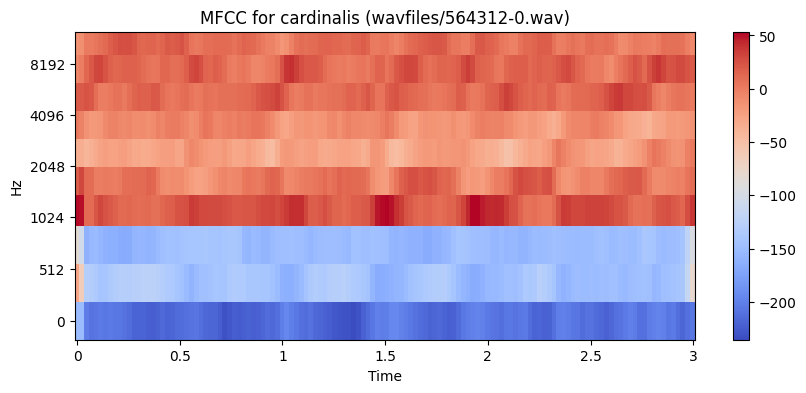

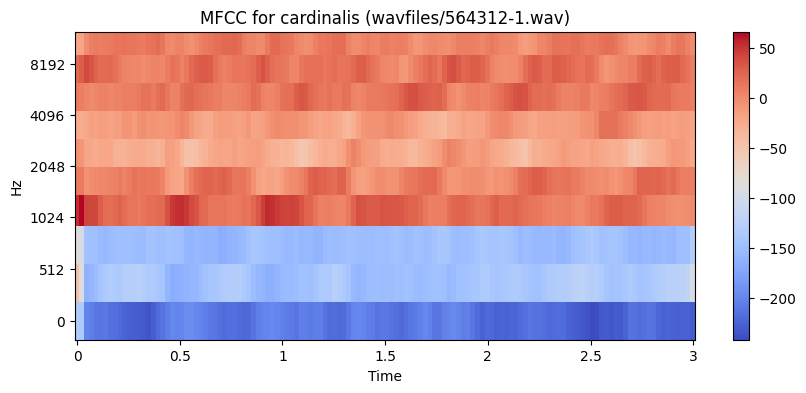

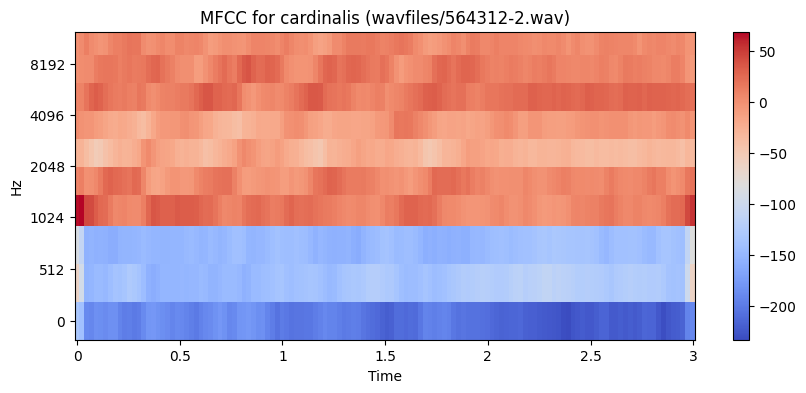

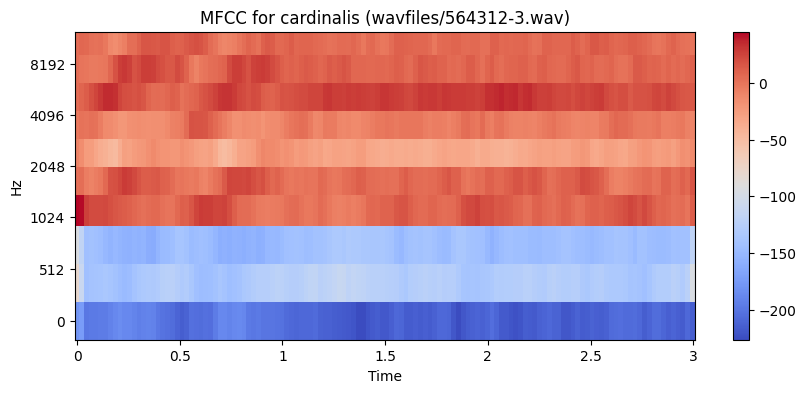

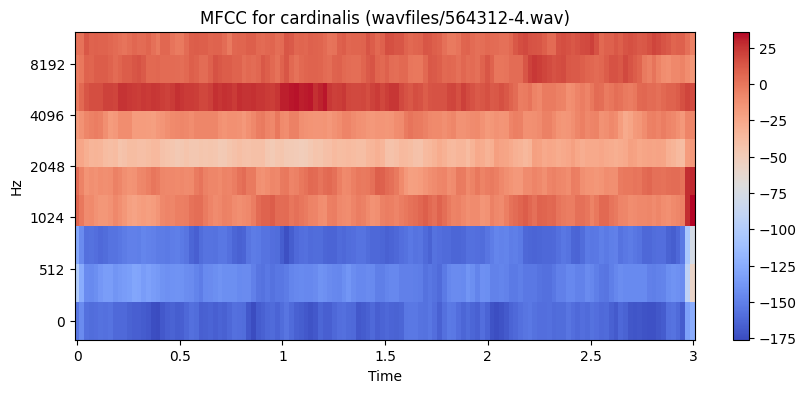

In [15]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import zipfile
from collections import defaultdict
import os

# Load metadata
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'  # Update this to your actual metadata path
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'  # Update this to your actual zip file path

metadata = pd.read_csv(metadata_path)

# Function to extract and plot MFCCs
def extract_and_plot_mfccs(metadata, zip_path):
    species_count = defaultdict(int)
    max_plots_per_species = 5

    with zipfile.ZipFile(zip_path, 'r') as z:
        for index, row in metadata.iterrows():
            species = row['species']
            if species_count[species] < max_plots_per_species:
                file_path = os.path.join('wavfiles', row['filename'])  # Adjust according to how your filenames are stored in metadata
                if file_path in z.namelist():
                    with z.open(file_path) as file:
                        y, sr = librosa.load(file, sr=None)
                        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)  # You can adjust the number of MFCCs

                        plt.figure(figsize=(10, 4))
                        librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='mel')
                        plt.colorbar()
                        plt.title(f'MFCC for {species} ({file_path})')
                        plt.show()

                        species_count[species] += 1

# Call the function to extract and plot MFCCs
extract_and_plot_mfccs(metadata, zip_path)


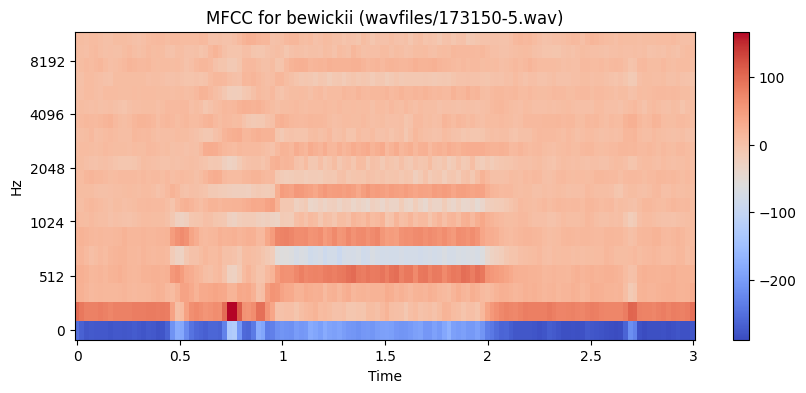

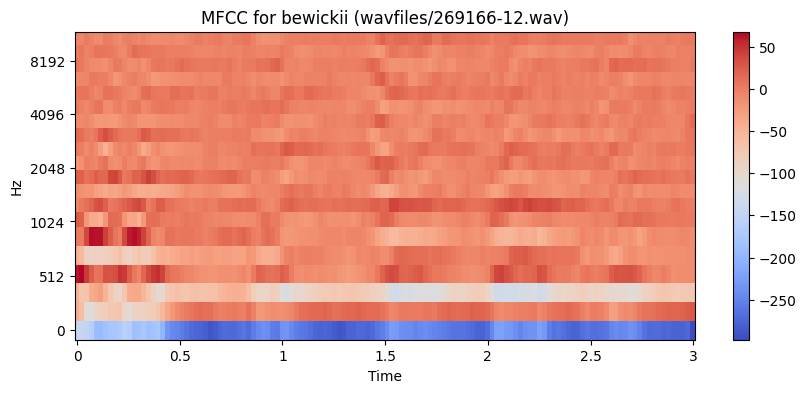

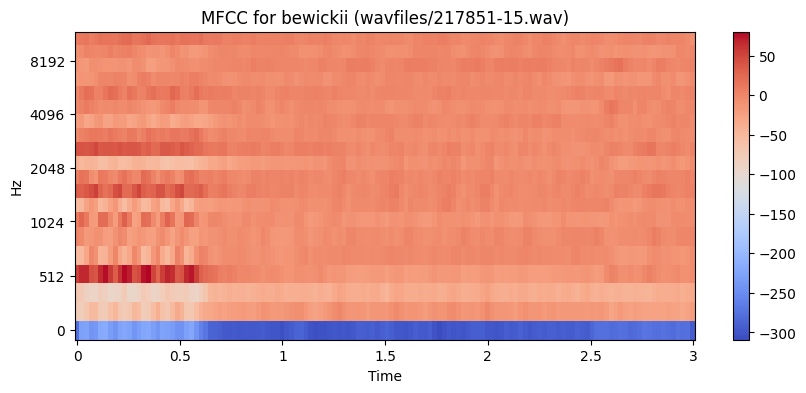

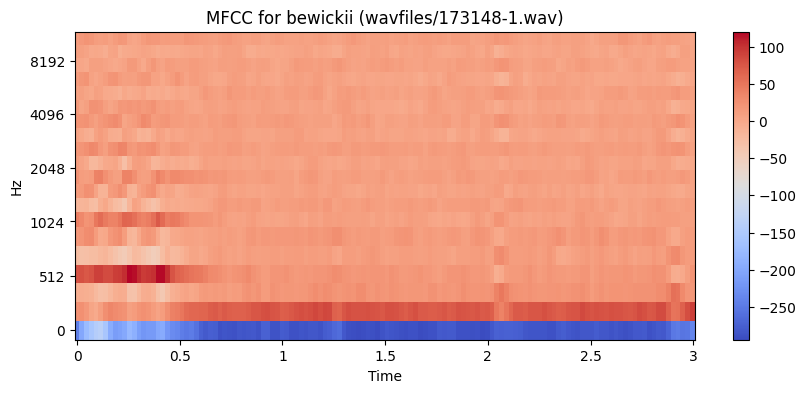

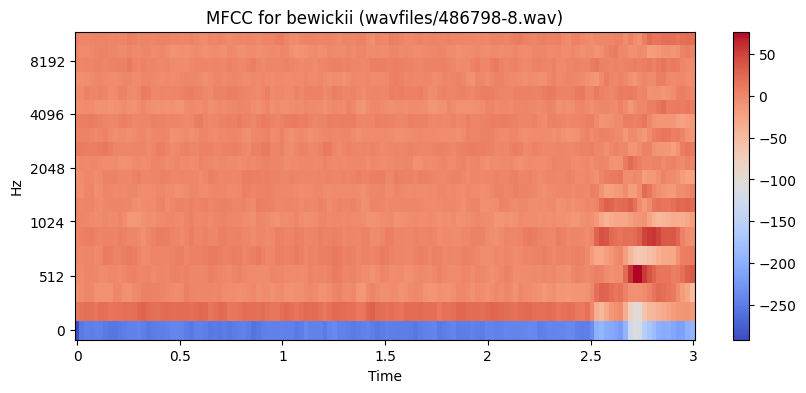

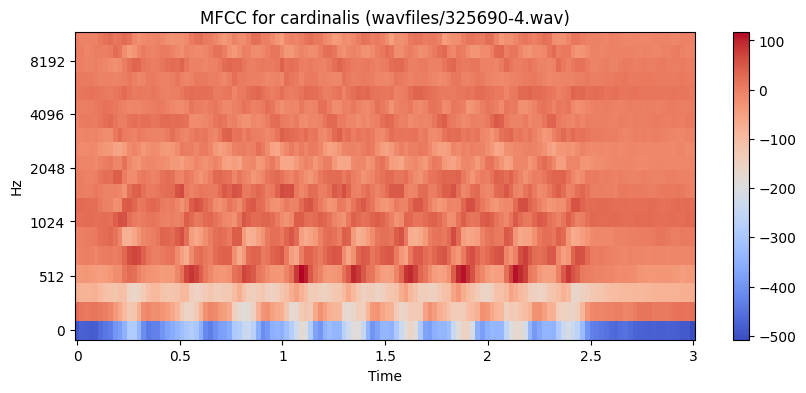

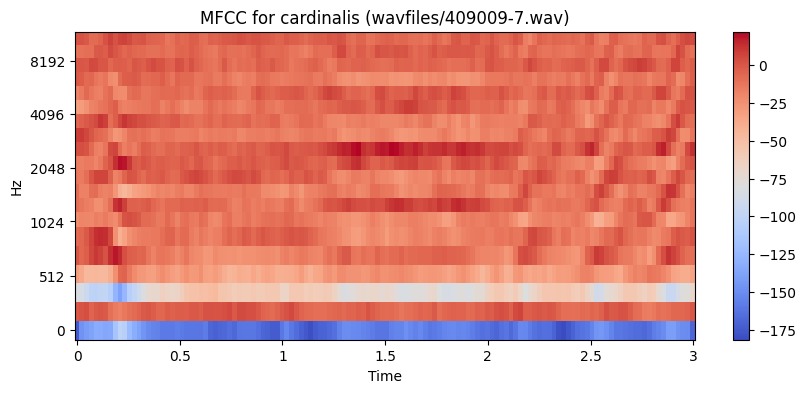

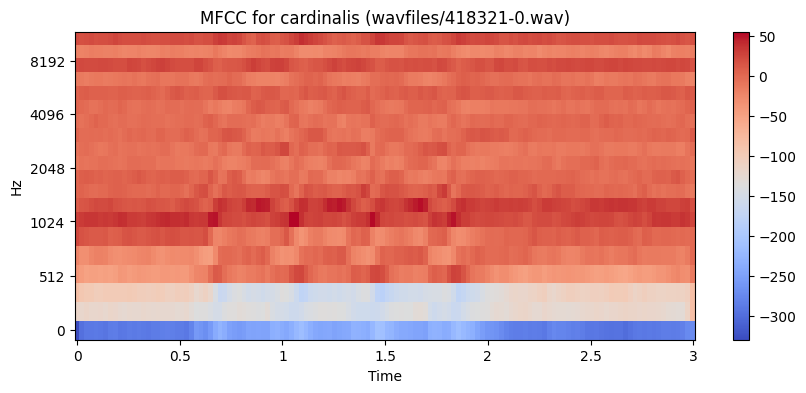

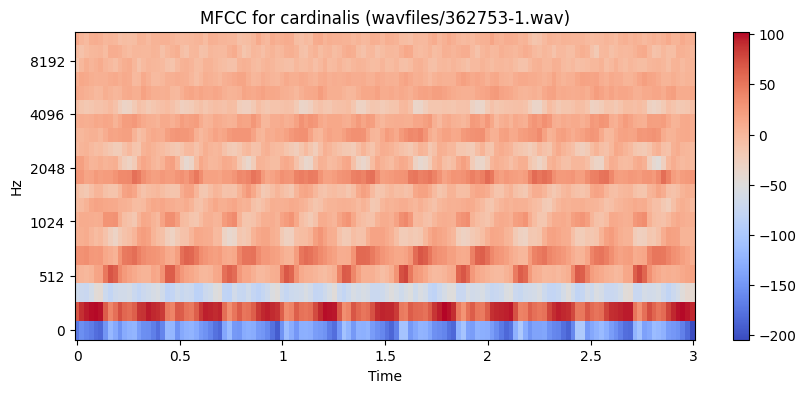

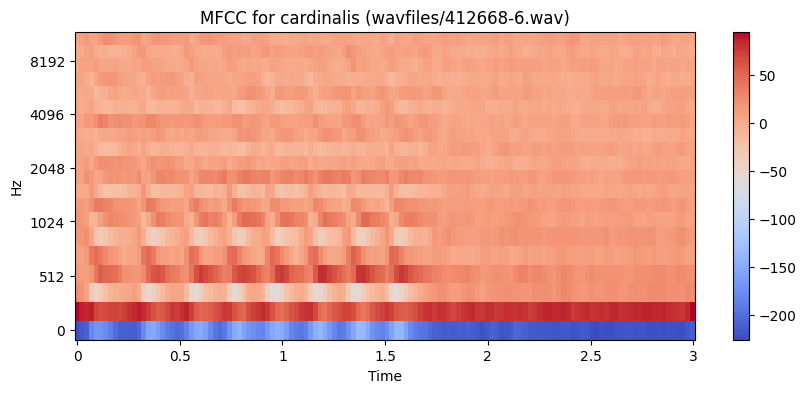

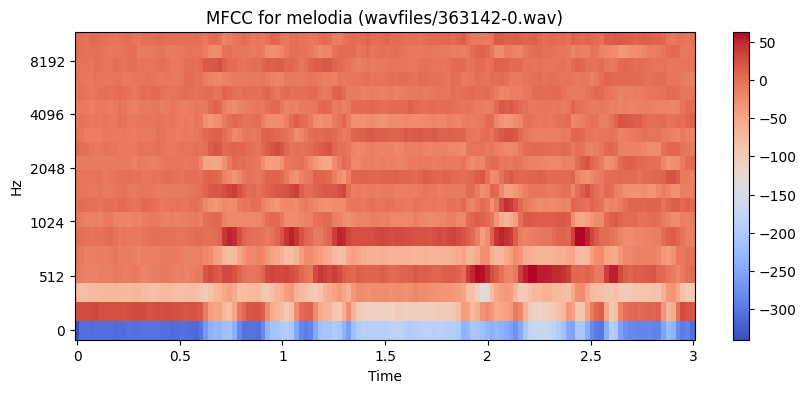

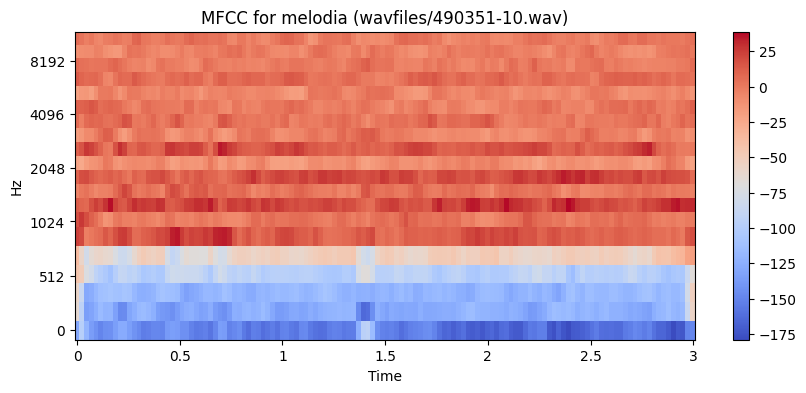

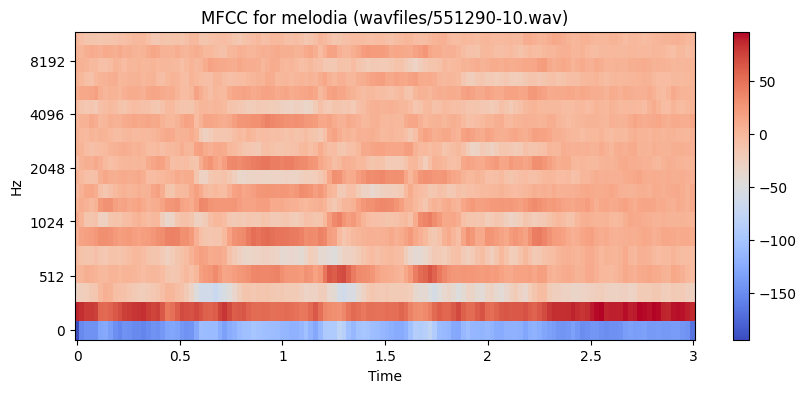

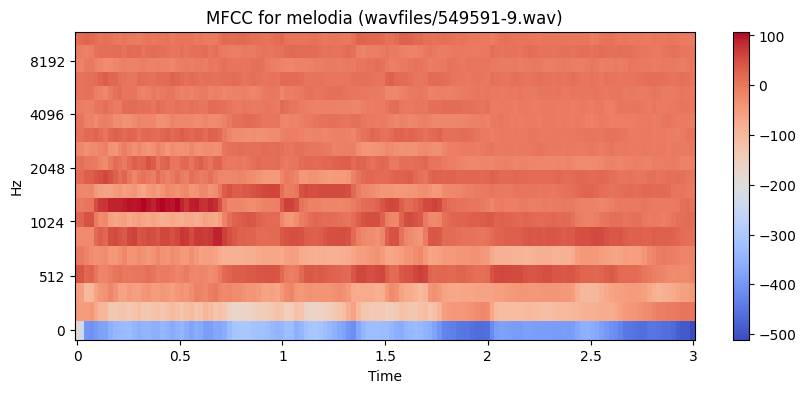

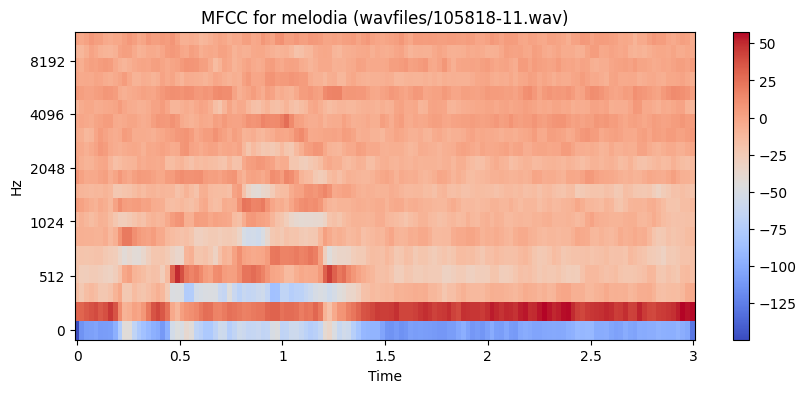

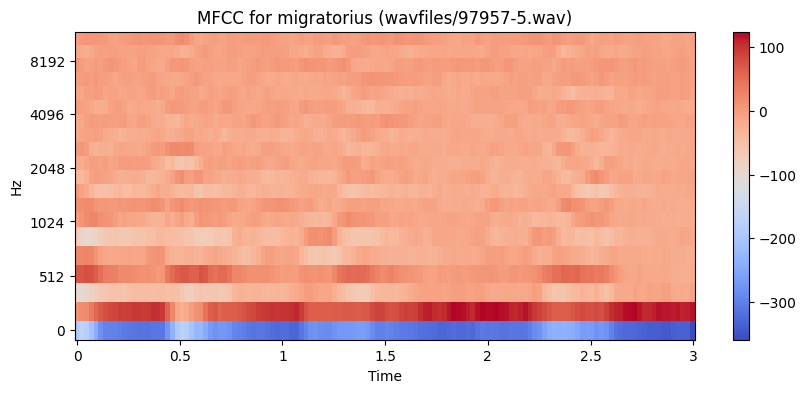

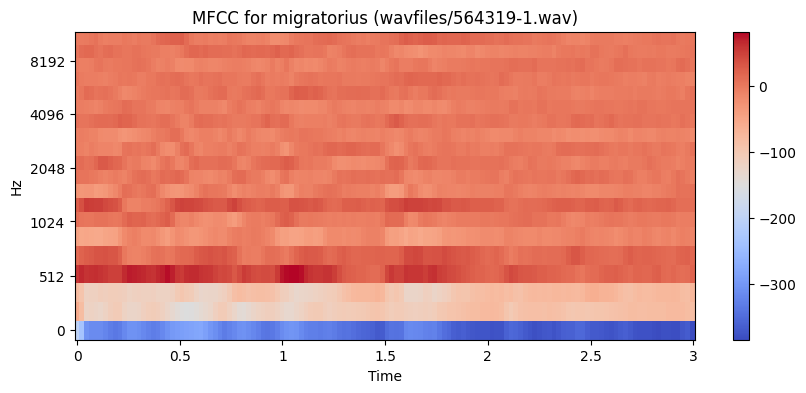

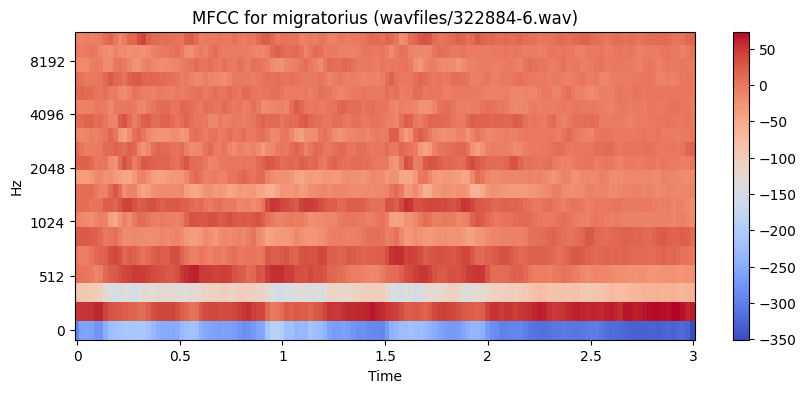

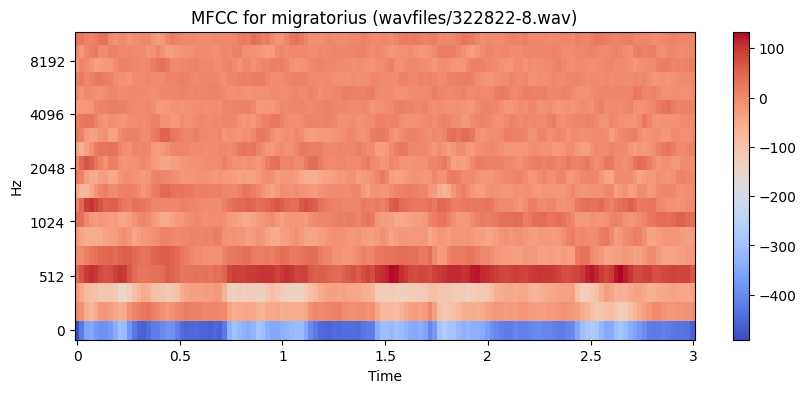

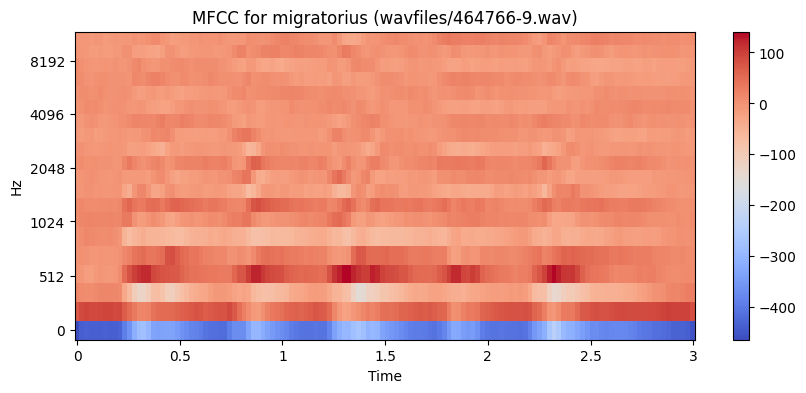

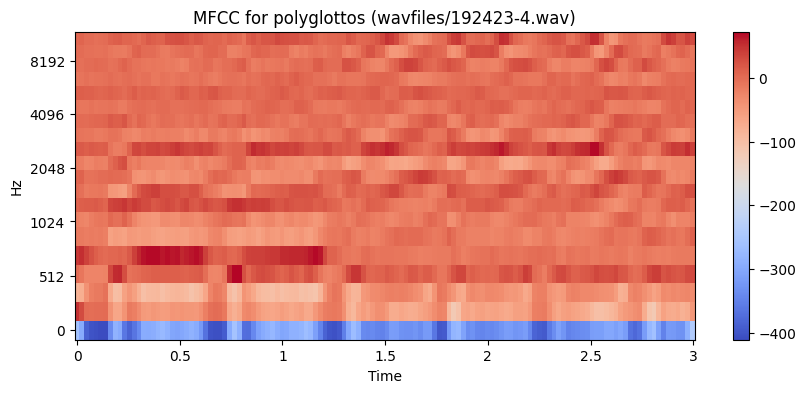

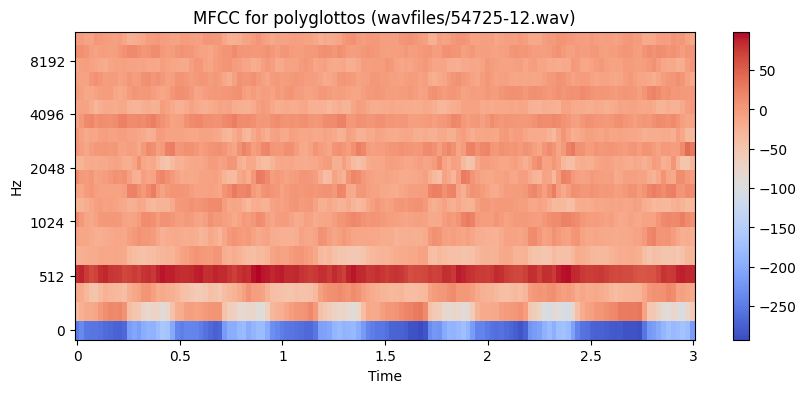

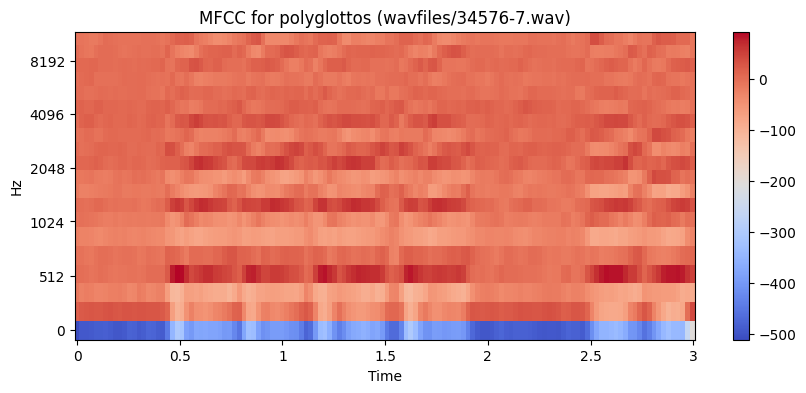

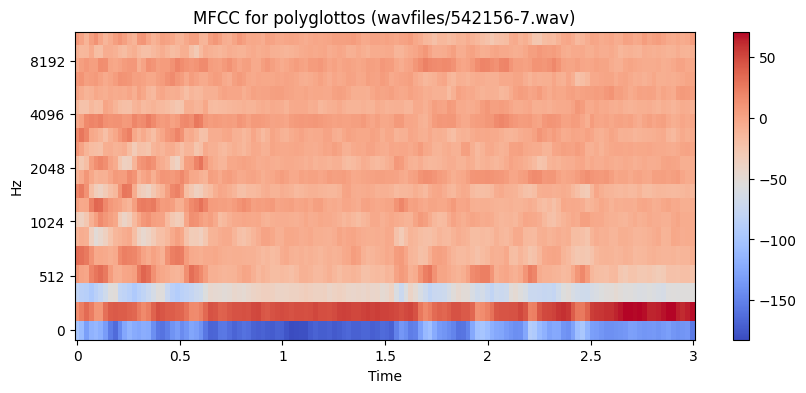

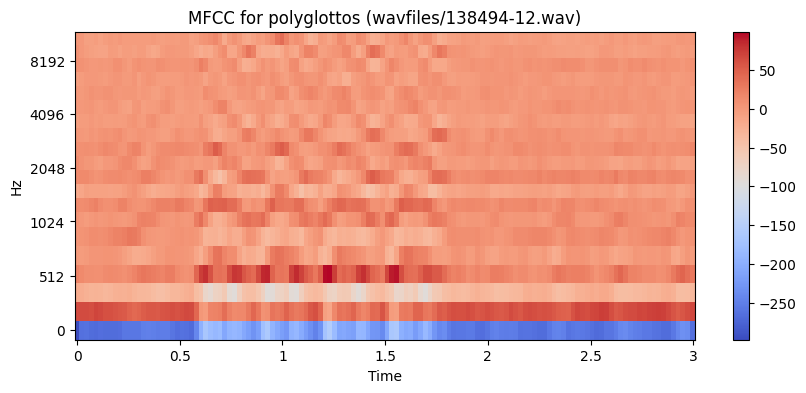

In [16]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import zipfile
from collections import defaultdict

# Load metadata
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'  # Update this to your actual metadata path
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'  # Update this to your actual zip file path

metadata = pd.read_csv(metadata_path)

# Randomly sample 5 entries per species
sampled_metadata = metadata.groupby('species').apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True)

# Function to extract and plot MFCCs
def extract_and_plot_mfccs(metadata, zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        for index, row in metadata.iterrows():
            species = row['species']
            file_path = os.path.join('wavfiles', row['filename'])  # Adjust according to how your filenames are stored in metadata
            if file_path in z.namelist():
                with z.open(file_path) as file:
                    y, sr = librosa.load(file, sr=None)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Extracting 20 MFCCs

                    plt.figure(figsize=(10, 4))
                    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel', sr=sr)
                    plt.colorbar()
                    plt.title(f'MFCC for {species} ({file_path})')
                    plt.show()

# Call the function to extract and plot MFCCs
extract_and_plot_mfccs(sampled_metadata, zip_path)


In [62]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.6 MB/s eta 0:00:00


  0%|          | 0/213 [00:00<?, ?it/s]

Skipping index 0 due to error: Length of features is not equal to the length of shap_values!
Skipping index 1 due to error: Length of features is not equal to the length of shap_values!
Skipping index 2 due to error: index 2 is out of bounds for axis 0 with size 2


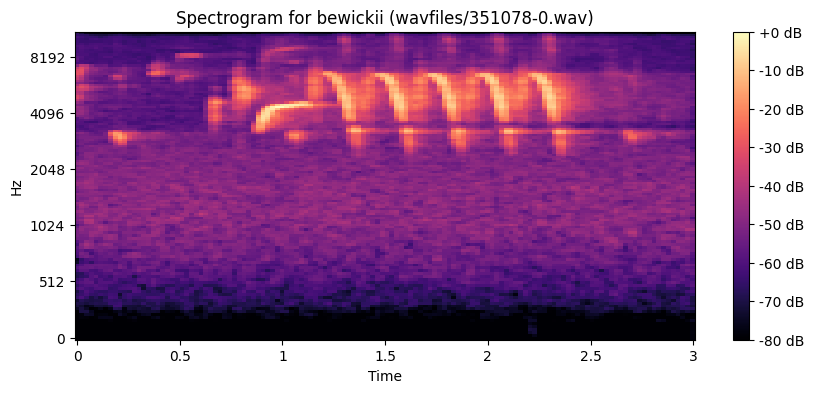

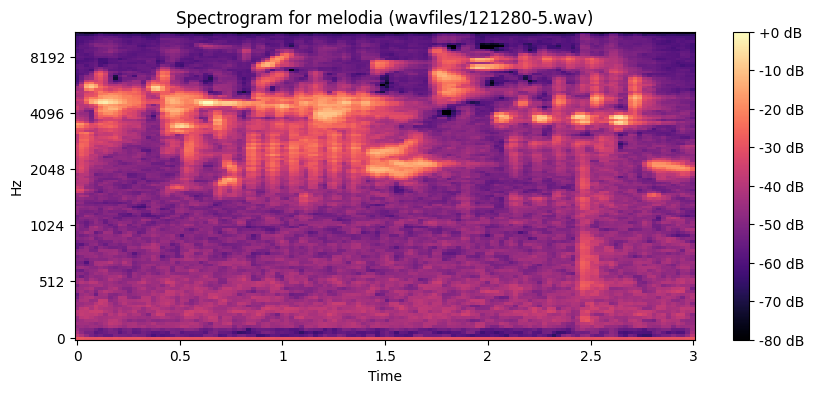

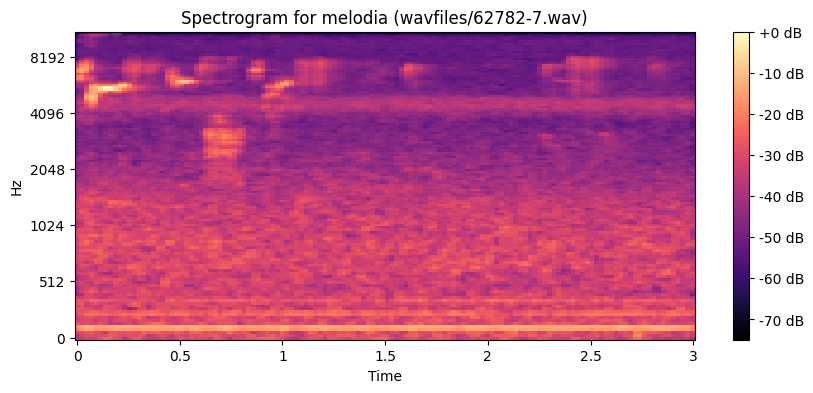

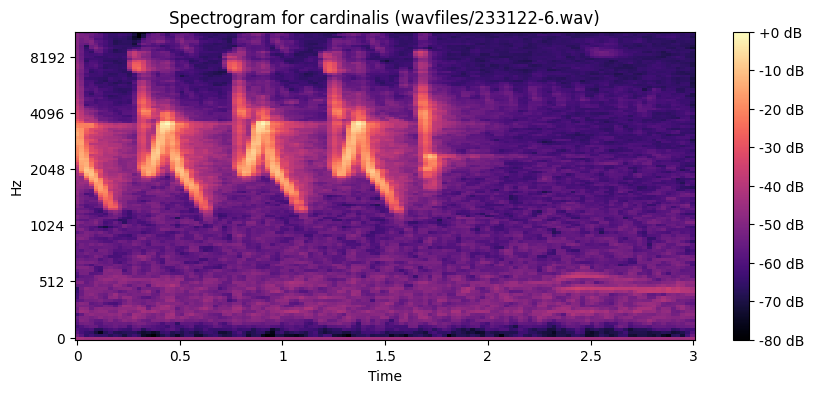

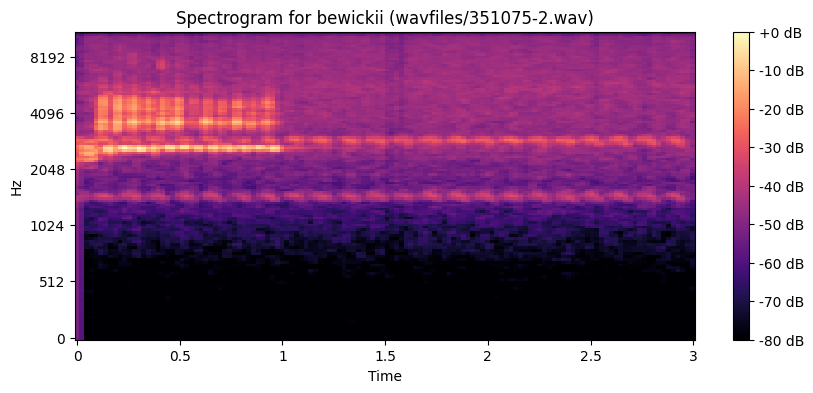

In [17]:
import pandas as pd
import numpy as np
import librosa
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load metadata
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'
metadata = pd.read_csv(metadata_path)

# Extract features from audio files
def extract_features(zip_path, metadata):
    features = []
    with zipfile.ZipFile(zip_path, 'r') as z:
        for _, row in metadata.iterrows():
            file_path = os.path.join('wavfiles', row['filename'])
            if file_path in z.namelist():
                with z.open(file_path) as file:
                    y, sr = librosa.load(file, sr=None)
                    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
                    if spectral_centroid.size > 0:
                        features.append([np.mean(spectral_centroid), np.std(spectral_centroid)])
                    else:
                        features.append([np.nan, np.nan])
    return features

features = extract_features(zip_path, metadata)
features_df = pd.DataFrame(features, columns=['spectral_centroid_mean', 'spectral_centroid_std'])

# Append features to the metadata DataFrame
metadata = pd.concat([metadata, features_df], axis=1).dropna().reset_index(drop=True)

# Preparing the data
X = metadata[['spectral_centroid_mean', 'spectral_centroid_std']]
y = pd.factorize(metadata['species'])[0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train_scaled, y_train)

# Create a Kernel SHAP explainer
explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Visualize SHAP values
shap.initjs()
for i in range(min(3, len(X_test_scaled))):  # Display up to 3 samples
    try:
        shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test_scaled[i], feature_names=['spectral_centroid_mean', 'spectral_centroid_std'])
    except Exception as e:
        print(f"Skipping index {i} due to error: {str(e)}")

# Assuming a function to plot spectrograms is defined, similar to previous descriptions
def plot_spectrograms(zip_path, metadata):
    with zipfile.ZipFile(zip_path, 'r') as z:
        for index, row in metadata.iterrows():
            file_path = os.path.join('wavfiles', row['filename'])
            if file_path in z.namelist():
                with z.open(file_path) as file:
                    y, sr = librosa.load(file, sr=None)
                    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
                    S_DB = librosa.power_to_db(S, ref=np.max)
                    plt.figure(figsize=(10, 4))
                    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
                    plt.colorbar(format='%+2.0f dB')
                    plt.title(f'Spectrogram for {row["species"]} ({file_path})')
                    plt.show()

# Call to plot spectrograms for visualization
plot_spectrograms(zip_path, metadata.sample(5))
